# Import Necessary Package

In [2]:
# load relavent package

import pandas as pd
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.gridspec as gridspec
from sklearn.preprocessing import StandardScaler
from sklearn import neighbors

C:\Users\eric_\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\eric_\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\eric_\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\eric_\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passi

# Import New SOLO and Mavic Data

In [4]:
WIND_DATA_URL = "https://raw.githubusercontent.com/SophiaCheung1211/Using_Drone_to_Predict_Wind_Speed/master/Wind_Data/Mavic/sonic_anemometer_march26.csv"
WIND_TRUNCATED_SOLO_URL =  "https://raw.githubusercontent.com/SophiaCheung1211/Using_Drone_to_Predict_Wind_Speed/master/Wind_Data/SOLO/truncated_solo_wind.csv"
WIND_TRUNCATED_MAVIC_URL = "https://raw.githubusercontent.com/SophiaCheung1211/Using_Drone_to_Predict_Wind_Speed/master/Wind_Data/Mavic/truncated_mavic_wind.csv"
MAVIC_FLIGHT1_URL = "https://raw.githubusercontent.com/SophiaCheung1211/Using_Drone_to_Predict_Wind_Speed/master/Drone_Data/Mavic/mavic_march26_flight1.csv"
MAVIC_FLIGHT2_URL = "https://raw.githubusercontent.com/SophiaCheung1211/Using_Drone_to_Predict_Wind_Speed/master/Drone_Data/Mavic/mavic_march26_flight2.csv"
MAVIC_FLIGHT3_URL = "https://raw.githubusercontent.com/SophiaCheung1211/Using_Drone_to_Predict_Wind_Speed/master/Drone_Data/Mavic/mavic_march26_flight3.csv"
MAVIC_FLIGHT_CONCAT_URL = "https://raw.githubusercontent.com/SophiaCheung1211/Using_Drone_to_Predict_Wind_Speed/master/Drone_Data/Mavic/concatenated_mavic.csv"
SOLO_FLIGHT_CONCAT_URL = "https://raw.githubusercontent.com/SophiaCheung1211/Using_Drone_to_Predict_Wind_Speed/master/Drone_Data/SOLO/concatenated_solo.csv"
wind_data = pd.read_csv(WIND_DATA_URL)
wind_truncated_mavic = pd.read_csv(WIND_TRUNCATED_MAVIC_URL)
wind_truncated_solo = pd.read_csv(WIND_TRUNCATED_SOLO_URL)
mavic_flight1 = pd.read_csv(MAVIC_FLIGHT1_URL)
mavic_flight2 = pd.read_csv(MAVIC_FLIGHT2_URL)
mavic_flight3 = pd.read_csv(MAVIC_FLIGHT3_URL)
mavic_concat = pd.read_csv(MAVIC_FLIGHT_CONCAT_URL)
solo_concat = pd.read_csv(SOLO_FLIGHT_CONCAT_URL)

EQUAL_MAVIC_URL = "https://raw.githubusercontent.com/SophiaCheung1211/Using_Drone_to_Predict_Wind_Speed/master/Equal_Length_Data/LF-concatenated_mav.csv"
EQUAL_SOLO_URL = "https://raw.githubusercontent.com/SophiaCheung1211/Using_Drone_to_Predict_Wind_Speed/master/Equal_Length_Data/LF-concatenated_solo.csv"
EQUAL_WIND_URL = "https://raw.githubusercontent.com/SophiaCheung1211/Using_Drone_to_Predict_Wind_Speed/master/Equal_Length_Data/LF-truncated_wind.csv"
mavic_concat = pd.read_csv(EQUAL_MAVIC_URL)
solo_concat = pd.read_csv(EQUAL_SOLO_URL)
wind = pd.read_csv(EQUAL_WIND_URL)


## Clean the Datasets

In [1128]:
# drop the index column
wind_truncated_mavic = wind_truncated_mavic.drop(columns=['index'])
wind_truncated_solo = wind_truncated_solo.drop(columns=['index'])
wind = wind.drop(columns=['index'])

In [1130]:
solo_concat

,index,solo_roll,solo_pitch,solo_tilt,solo_acc_x,solo_acc_y,solo_acc_z
0,0,2.520000,4.266667,4.954099,0.795420,-0.426810,-9.919106
1,1,2.585000,4.035000,4.790866,0.706003,-0.456654,-9.986795
2,2,2.733333,4.073333,4.904137,0.806733,-0.347283,-9.887735
3,3,1.790000,4.080000,4.454782,0.675360,-0.403155,-9.741537
4,4,2.723333,3.956667,4.802079,0.763407,-0.403770,-9.770672
...,...,...,...,...,...,...,...
2216,2216,2.036667,2.326667,3.091781,0.603815,-0.316865,-9.958909
2217,2217,1.645000,2.980000,3.403525,0.498798,-0.429512,-9.949614
2218,2218,3.603333,2.040000,4.140063,0.565965,-0.460122,-10.014454
2219,2219,2.910000,2.105000,3.591005,0.337627,-0.437382,-10.344625


In [1131]:
# drop the index column
mavic_concat = mavic_concat.drop(columns=['index'])
solo_concat = solo_concat.drop(columns=['index'])

In [1132]:
# subset the originial dataset to contains only Roll, Pitch, Tilt, AccX, nad AccY
solo_concat = solo_concat.iloc[:,:5]
solo_concat

,solo_roll,solo_pitch,solo_tilt,solo_acc_x,solo_acc_y
0,2.520000,4.266667,4.954099,0.795420,-0.426810
1,2.585000,4.035000,4.790866,0.706003,-0.456654
2,2.733333,4.073333,4.904137,0.806733,-0.347283
3,1.790000,4.080000,4.454782,0.675360,-0.403155
4,2.723333,3.956667,4.802079,0.763407,-0.403770
...,...,...,...,...,...
2216,2.036667,2.326667,3.091781,0.603815,-0.316865
2217,1.645000,2.980000,3.403525,0.498798,-0.429512
2218,3.603333,2.040000,4.140063,0.565965,-0.460122
2219,2.910000,2.105000,3.591005,0.337627,-0.437382


In [1133]:
# subset the originial dataset to contains only Roll, Pitch, Tilt, AccX, nad AccY
mavic_concat = mavic_concat.iloc[:,:5]
mavic_concat

,mav_roll,mav_pitch,mav_tilt,mav_acc_x,mav_acc_y
0,2.171723,5.056454,5.501987,0.090618,-0.036859
1,2.062102,5.418120,5.796172,0.095688,-0.033277
2,1.818813,5.834557,6.110539,0.098315,-0.036174
3,2.427100,5.414267,5.931910,0.093983,-0.039623
4,2.285227,5.380641,5.844501,0.092391,-0.040307
...,...,...,...,...,...
2216,1.881313,4.913622,5.260640,0.092989,-0.047239
2217,2.428385,3.988813,4.668849,0.077576,-0.038165
2218,3.666743,4.168956,5.549906,0.086782,-0.049995
2219,2.454890,5.974841,6.457813,0.090419,-0.056244


In [1246]:
# combine new solo and mavic dataset 
special = pd.concat([solo_concat, mavic_concat], axis = 1)
special.shape

(2221, 10)

In [1247]:
# use MinMaxScaler to scale the MaxMinScaler 
scaler = MinMaxScaler(feature_range=(0, 1))
mavic_scaled = scaler.fit_transform(mavic_concat)
solo_scaled = scaler.fit_transform(solo_concat)
wind_scaled = scaler.fit_transform(wind)
special_scaled = scaler.fit_transform(special)

In [1135]:
mavic_scaled.shape

(2221, 5)

In [1136]:
solo_scaled.shape

(2221, 5)

In [1137]:
wind_truncated_mavic.shape

(2339, 1)

## Prepare Data for LSTM

### Reshape The Data

In [1138]:
# LAG_OBSERVATIONS_SIZE is the prediction size
# PREDICT_SIZE is the prediction size
LAG_OBSERVATIONS_SIZE = 10
PREDICT_SIZE = 1

In [1139]:
# Functions used to prepare independent variables and depedent variables 

# Prepare the input variables (ex. Roll and Pitch)
def DataPrepare(data, lag_obs=2, n_output=5):
    prepared_data = []
    for i in range(len(data) - lag_obs - n_output + 1):
        prepared_data.append(np.array(data[i:i + lag_obs]))
    return np.array(prepared_data)


# Prepare the dependent variables - windspeed
def LabelPrepare(data, lag_obs=2, n_output=5):
    prepared_label = []
    for i in range((0 + lag_obs), (len(data) - n_output + 1)):
        tmp = []
        for j in range(i, i + n_output):
            tmp.append(float(data[j]))
        prepared_label.append(np.array(tmp))       
    return np.array(prepared_label)

In [1248]:
# mavic data
mavic_prepared = DataPrepare(mavic_scaled, LAG_OBSERVATIONS_SIZE, PREDICT_SIZE)
#mavic_prepared = DataPrepare(np.array(mavic_concat), LAG_OBSERVATIONS_SIZE, PREDICT_SIZE)
# solo data
solo_prepared = DataPrepare(solo_scaled, LAG_OBSERVATIONS_SIZE, PREDICT_SIZE)
#solo_prepared = DataPrepare(np.array(solo_concat), LAG_OBSERVATIONS_SIZE, PREDICT_SIZE)

special_prepared = DataPrepare(special_scaled, LAG_OBSERVATIONS_SIZE, PREDICT_SIZE)
# wind data
wind_mavic_prepared = LabelPrepare(np.array(wind), LAG_OBSERVATIONS_SIZE, PREDICT_SIZE)
wind_solo_prepared = LabelPrepare(np.array(wind), LAG_OBSERVATIONS_SIZE, PREDICT_SIZE)
#wind_solo_prepared = LabelPrepare(wind_scaled, LAG_OBSERVATIONS_SIZE, PREDICT_SIZE)

In [1141]:
mavic_prepared.shape

(2211, 10, 5)

In [1142]:
wind_mavic_prepared.shape

(2211, 1)

In [1143]:
solo_prepared.shape

(2211, 10, 5)

In [1144]:
wind_solo_prepared.shape

(2211, 1)

In [1145]:
wind_truncated_solo

,windspeed
0,0.790670
1,1.120466
2,1.836090
3,1.397597
4,1.356768
...,...
2767,3.275213
2768,3.234731
2769,3.200534
2770,3.265304


### Split Test and Train Set 

In [1146]:
# 80 and 20 split ratio 

mavic_index = int(len(mavic_prepared) * 0.8)
mavic_val_index = int(mavic_index*0.9)

solo_index = int(len(solo_prepared) * 0.8)
solo_val_index = int(solo_index*0.9)

In [1249]:
# Split the prepared datasets into train sets and test sets 

X_train_mavic, X_test_mavic = mavic_prepared[:mavic_index], mavic_prepared[mavic_index:]
y_train_mavic, y_test_mavic = wind_mavic_prepared[:mavic_index], wind_mavic_prepared[mavic_index:]

# X_train_mavic, X_val_mavic = X_train_mavic_tmp[:mavic_val_index], X_train_mavic_tmp[mavic_val_index:]
# y_train_mavic, y_val_mavic = y_train_mavic_tmp[:mavic_val_index], y_train_mavic_tmp[mavic_val_index:]

X_train_solo, X_test_solo = solo_prepared[:solo_index], solo_prepared[solo_index:]
y_train_solo, y_test_solo = wind_solo_prepared[:solo_index], wind_solo_prepared[solo_index:]

# X_train_solo, X_val_solo = X_train_solo_tmp[:solo_val_index], X_train_solo_tmp[solo_val_index:]
# y_train_solo, y_val_solo = y_train_solo_tmp[:solo_val_index], y_train_solo_tmp[solo_val_index:]

X_train_special, X_test_special = special_prepared[:solo_index], special_prepared[solo_index:]
y_train_special, y_test_special = wind_solo_prepared[:solo_index], wind_solo_prepared[solo_index:]

In [1285]:
X_train_mavic_knn, X_test_mavic_knn = mavic_scaled[:mavic_index], mavic_scaled[mavic_index:]
y_train_mavic_knn, y_test_mavic_knn = np.array(wind)[:mavic_index], np.array(wind)[mavic_index:]

X_train_solo_knn, X_test_solo_knn = solo_scaled[:solo_index], solo_scaled[solo_index:]
y_train_solo_knn, y_test_solo_knn = wind_solo_prepared[:solo_index], np.array(wind)[solo_index:]

In [1250]:
X_train_special.shape

(1768, 10, 10)

In [1149]:
X_test_solo.shape

(443, 10, 5)

In [1150]:
y_test_mavic.shape

(443, 1)

# Number of Layers and Neurons

## Model1 - 3 layers - input size 40, prediction size 5

In [1065]:
numPoints, numFeatures = 40, 5

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.LSTM(128, return_sequences=True, input_shape=(numPoints, numFeatures)))
model.add(tf.keras.layers.Dropout(rate=0.2))
model.add(tf.keras.layers.LSTM(64, return_sequences=True))
model.add(tf.keras.layers.Dropout(rate=0.2))
model.add(tf.keras.layers.LSTM(32, activation='relu'))
model.add(tf.keras.layers.Dense(5))

optimizer=tf.keras.optimizers.RMSprop(lr=0.001, rho=0.9)

model.compile(
        optimizer=optimizer, 
        loss='mse',
        metrics = ["accuracy"])

In [174]:
history = model.fit(X_train_solo, y_train_solo, epochs = 50)

Epoch 1/50
1741/1741 [==============================] - 9s 5ms/sample - loss: 15.6088 - acc: 0.2453
Epoch 2/50
1741/1741 [==============================] - 8s 4ms/sample - loss: 1.7570 - acc: 0.2188
Epoch 3/50
1741/1741 [==============================] - 8s 4ms/sample - loss: 1.7653 - acc: 0.1947
Epoch 4/50
1741/1741 [==============================] - 8s 4ms/sample - loss: 1.4310 - acc: 0.2108
Epoch 5/50
1741/1741 [==============================] - 8s 4ms/sample - loss: 1.1682 - acc: 0.2016
Epoch 6/50
1741/1741 [==============================] - 8s 4ms/sample - loss: 0.9789 - acc: 0.2188
Epoch 7/50
1741/1741 [==============================] - 8s 4ms/sample - loss: 0.9085 - acc: 0.2074
Epoch 8/50
1741/1741 [==============================] - 8s 4ms/sample - loss: 0.8250 - acc: 0.1924
Epoch 9/50
1741/1741 [==============================] - 8s 4ms/sample - loss: 0.7952 - acc: 0.2028
Epoch 10/50
1741/1741 [==============================] - 8s 5ms/sample - loss: 0.7367 - acc: 0.2137
Epoch 11

In [182]:
pred1_raw = model.predict(X_test_solo)

pred1 = []
for row in pred1_raw:
    pred1.append(row[0])
pred1 = np.array(pred1).reshape(-1,1)

In [183]:
y_test1 = []
for row in y_test_solo:
    y_test1.append(row[0])
y_test1 = np.array(y_test1).reshape(-1,1)
y_test1.shape

(436, 1)

In [190]:
y_train1 = []
for row in y_train_solo:
    y_train1.append(row[0])
y_train1 = np.array(y_train1).reshape(-1,1)
y_train1.shape

(1741, 1)

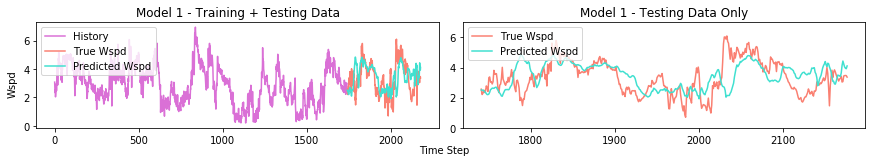

In [423]:
Title = "Model 1"
time = [i for i in range(2177)]

fig = plt.figure(figsize=(12, 2))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1])
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1])

axes = [ax0, ax1]


a = plt.gca()
a.set_ylim([0, 7])        
       
axes[0].plot(time[:1741], y_train1, label='History', color='orchid')
axes[0].plot(time[1741:], y_test1, label='True Wspd', color='salmon')
axes[0].plot(time[1741:], pred1, label='Predicted Wspd', color='turquoise')
       
axes[1].plot(time[1741:], y_test1, label='True Wspd', color='salmon')
axes[1].plot(time[1741:], pred1, label='Predicted Wspd', color='turquoise')
       
fig.tight_layout()
       
# Set labels
fig.text(0.5, 0.04, 'Time Step', ha='center', va='center')
fig.text(0, 0.5, 'Wspd', ha='center', va='center', rotation='vertical')

axes[0].set_title(Title + " - Training + Testing Data")
axes[1].set_title(Title + " - Testing Data Only")

ax0.legend(loc="upper left")
ax1.legend(loc="upper left")
plt.show()
plt.close()

In [537]:
mse1 = mean_squared_error(pred1, y_test1)
mse1

1.0941792567532842

## Model2 - 4 layers - input size 40, prediction size 5

In [201]:
numPoints, numFeatures = 40, 5

model2 = tf.keras.models.Sequential()
model2.add(tf.keras.layers.LSTM(256, return_sequences=True, input_shape=(numPoints, numFeatures)))
model2.add(tf.keras.layers.Dropout(rate=0.2))
model2.add(tf.keras.layers.LSTM(128, return_sequences=True))
model2.add(tf.keras.layers.Dropout(rate=0.2))
model2.add(tf.keras.layers.LSTM(64, return_sequences=True))
model2.add(tf.keras.layers.Dropout(rate=0.2))
model2.add(tf.keras.layers.LSTM(32, activation='relu'))
model2.add(tf.keras.layers.Dense(5))

optimizer=tf.keras.optimizers.RMSprop(lr=0.001, rho=0.9)

model2.compile(
        optimizer=optimizer, 
        loss='mse',
        metrics = ["accuracy"])

In [202]:
history2 = model2.fit(X_train_solo, y_train_solo, epochs = 50)

Epoch 1/50
1741/1741 [==============================] - 26s 15ms/sample - loss: 3.2658 - acc: 0.2119
Epoch 2/50
1741/1741 [==============================] - 24s 14ms/sample - loss: 1.8284 - acc: 0.2079
Epoch 3/50
1741/1741 [==============================] - 24s 14ms/sample - loss: 1.7621 - acc: 0.2142
Epoch 4/50
1741/1741 [==============================] - 24s 14ms/sample - loss: 1.5113 - acc: 0.2016
Epoch 5/50
1741/1741 [==============================] - 24s 14ms/sample - loss: 1.1437 - acc: 0.2234
Epoch 6/50
1741/1741 [==============================] - 24s 14ms/sample - loss: 0.9103 - acc: 0.2177
Epoch 7/50
1741/1741 [==============================] - 24s 14ms/sample - loss: 3.6647 - acc: 0.2028
Epoch 8/50
1741/1741 [==============================] - 25s 14ms/sample - loss: 0.6918 - acc: 0.1970
Epoch 9/50
1741/1741 [==============================] - 24s 14ms/sample - loss: 0.7350 - acc: 0.2051
Epoch 10/50
1741/1741 [==============================] - 25s 14ms/sample - loss: 0.7585 - a

In [206]:
pred2_raw = model2.predict(X_test_solo)

pred2 = []
for row in pred2_raw:
    pred2.append(row[0])
pred2 = np.array(pred2).reshape(-1,1)
pred2.shape

(436, 1)

In [207]:
y_test_mavic.shape

(436, 5)

In [208]:
y_test2 = []
for row in y_test_solo:
    y_test2.append(row[0])
y_test2 = np.array(y_test2).reshape(-1,1)
y_test2.shape

(436, 1)

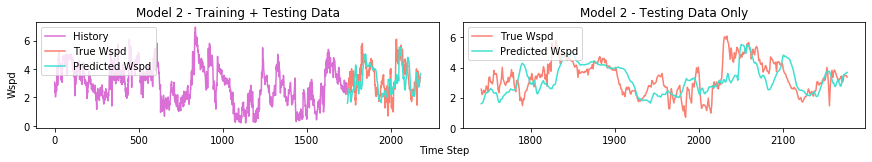

In [422]:
Title = "Model 2"
time = [i for i in range(2177)]

fig = plt.figure(figsize=(12, 2))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1])
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1])

axes = [ax0, ax1]


a = plt.gca()
a.set_ylim([0, 7])        
       
axes[0].plot(time[:1741], y_train1, label='History', color='orchid')
axes[0].plot(time[1741:], y_test2, label='True Wspd', color='salmon')
axes[0].plot(time[1741:], pred2, label='Predicted Wspd', color='turquoise')
       
axes[1].plot(time[1741:], y_test2, label='True Wspd', color='salmon')
axes[1].plot(time[1741:], pred2, label='Predicted Wspd', color='turquoise')
       
fig.tight_layout()
       
# Set labels
fig.text(0.5, 0.04, 'Time Step', ha='center', va='center')
fig.text(0, 0.5, 'Wspd', ha='center', va='center', rotation='vertical')

axes[0].set_title(Title + " - Training + Testing Data")
axes[1].set_title(Title + " - Testing Data Only")

ax0.legend(loc="upper left")
ax1.legend(loc="upper left")
plt.show()
plt.close()

In [538]:
mse2 = mean_squared_error(pred2, y_test2)
mse2

0.961246667719907

## Model 3 - 5 layers - input size 40, prediction size 5

In [214]:
numPoints, numFeatures = 40, 5

model3 = tf.keras.models.Sequential()
model3.add(tf.keras.layers.LSTM(512, return_sequences=True, input_shape=(numPoints, numFeatures)))
model3.add(tf.keras.layers.Dropout(rate=0.2))
model3.add(tf.keras.layers.LSTM(256, return_sequences=True))
model3.add(tf.keras.layers.Dropout(rate=0.2))
model3.add(tf.keras.layers.LSTM(128, return_sequences=True))
model3.add(tf.keras.layers.Dropout(rate=0.2))
model3.add(tf.keras.layers.LSTM(64, return_sequences=True))
model3.add(tf.keras.layers.Dropout(rate=0.2))
model3.add(tf.keras.layers.LSTM(32, activation='relu'))
model3.add(tf.keras.layers.Dense(5))

optimizer=tf.keras.optimizers.RMSprop(lr=0.001, rho=0.9)

model3.compile(
        optimizer=optimizer, 
        loss='mse',
        metrics = ["accuracy"])

In [215]:
history3 = model3.fit(X_train_solo, y_train_solo, epochs = 50)

Epoch 1/50
1741/1741 [==============================] - 63s 36ms/sample - loss: 21.8203 - acc: 0.2183
Epoch 2/50
1741/1741 [==============================] - 61s 35ms/sample - loss: 2.1891 - acc: 0.2051
Epoch 3/50
1741/1741 [==============================] - 62s 36ms/sample - loss: 2.3537 - acc: 0.2200
Epoch 4/50
1741/1741 [==============================] - 62s 35ms/sample - loss: 2.0856 - acc: 0.1959
Epoch 5/50
1741/1741 [==============================] - 62s 36ms/sample - loss: 1.7996 - acc: 0.1850
Epoch 6/50
1741/1741 [==============================] - 62s 36ms/sample - loss: 1.6608 - acc: 0.1878
Epoch 7/50
1741/1741 [==============================] - 62s 36ms/sample - loss: 1.7734 - acc: 0.2005
Epoch 8/50
1741/1741 [==============================] - 62s 36ms/sample - loss: 1.7690 - acc: 0.1895
Epoch 9/50
1741/1741 [==============================] - 62s 35ms/sample - loss: 1.5259 - acc: 0.1614
Epoch 10/50
1741/1741 [==============================] - 62s 36ms/sample - loss: 1.0431 - 

In [219]:
pred3_raw = model3.predict(X_test_solo)

pred3 = []
for row in pred3_raw:
    pred3.append(row[0])
pred3 = np.array(pred3).reshape(-1,1)
pred3.shape

(436, 1)

In [220]:
y_test3 = []
for row in y_test_solo:
    y_test3.append(row[0])
y_test3 = np.array(y_test3).reshape(-1,1)
y_test3.shape

(436, 1)

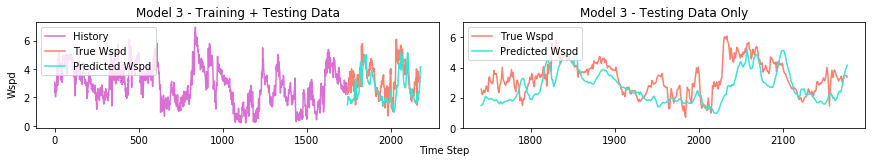

In [421]:
Title = "Model 3"
time = [i for i in range(2177)]

fig = plt.figure(figsize=(12, 2))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1])
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1])

axes = [ax0, ax1]


a = plt.gca()
a.set_ylim([0, 7])        
       
axes[0].plot(time[:1741], y_train1, label='History', color='orchid')
axes[0].plot(time[1741:], y_test3, label='True Wspd', color='salmon')
axes[0].plot(time[1741:], pred3, label='Predicted Wspd', color='turquoise')
       
axes[1].plot(time[1741:], y_test3, label='True Wspd', color='salmon')
axes[1].plot(time[1741:], pred3, label='Predicted Wspd', color='turquoise')
       
fig.tight_layout()
       
# Set labels
fig.text(0.5, 0.04, 'Time Step', ha='center', va='center')
fig.text(0, 0.5, 'Wspd', ha='center', va='center', rotation='vertical')

axes[0].set_title(Title + " - Training + Testing Data")
axes[1].set_title(Title + " - Testing Data Only")

ax0.legend(loc="upper left")
ax1.legend(loc="upper left")
plt.show()
plt.close()

In [539]:
mse3 = mean_squared_error(pred3, y_test3)
mse3

1.2359865791559863

# Activation Function and Optimizer

## Model 4 - relu activation function and tanh optimizer - input size 40, prediction size 5

In [230]:
numPoints, numFeatures = 40, 5

model4 = tf.keras.models.Sequential()
model4.add(tf.keras.layers.LSTM(256, return_sequences=True, input_shape=(numPoints, numFeatures)))
model4.add(tf.keras.layers.Dropout(rate=0.2))
model4.add(tf.keras.layers.LSTM(128, return_sequences=True))
model4.add(tf.keras.layers.Dropout(rate=0.2))
model4.add(tf.keras.layers.LSTM(64, activation='relu'))
model4.add(tf.keras.layers.Dense(5))

# optimizer=tf.keras.optimizers.RMSprop(lr=0.001, rho=0.9)

model4.compile(
        optimizer='adam',
        loss = 'mse',
        metrics = ["accuracy"])

In [231]:
history4 = model4.fit(X_train_solo, y_train_solo, epochs = 50)

Epoch 1/50
1741/1741 [==============================] - 36s 20ms/sample - loss: 6.0193 - acc: 0.2246
Epoch 2/50
1741/1741 [==============================] - 34s 19ms/sample - loss: 1.1442 - acc: 0.1861
Epoch 3/50
1741/1741 [==============================] - 34s 20ms/sample - loss: 0.9567 - acc: 0.2051
Epoch 4/50
1741/1741 [==============================] - 34s 20ms/sample - loss: 0.8908 - acc: 0.2137
Epoch 5/50
1741/1741 [==============================] - 34s 20ms/sample - loss: 0.8708 - acc: 0.2177
Epoch 6/50
1741/1741 [==============================] - 34s 20ms/sample - loss: 0.8312 - acc: 0.2068
Epoch 7/50
1741/1741 [==============================] - 34s 20ms/sample - loss: 0.7910 - acc: 0.1861
Epoch 8/50
1741/1741 [==============================] - 34s 20ms/sample - loss: 0.7617 - acc: 0.2091
Epoch 9/50
1741/1741 [==============================] - 34s 20ms/sample - loss: 0.7592 - acc: 0.2056
Epoch 10/50
1741/1741 [==============================] - 36s 20ms/sample - loss: 0.7663 - a

In [234]:
pred4_raw = model4.predict(X_test_solo)

pred4 = []
for row in pred4_raw:
    pred4.append(row[0])
pred4 = np.array(pred4).reshape(-1,1)
pred4.shape

(436, 1)

In [235]:
y_test4 = []
for row in y_test_solo:
    y_test4.append(row[0])
y_test4 = np.array(y_test3).reshape(-1,1)
y_test4.shape

(436, 1)

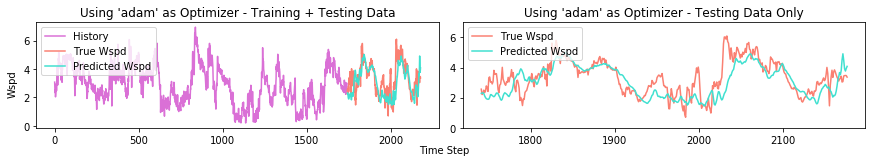

In [418]:
Title = "Using \'adam\' as Optimizer"
time = [i for i in range(2177)]

fig = plt.figure(figsize=(12, 2))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1])
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1])

axes = [ax0, ax1]


a = plt.gca()
a.set_ylim([0, 7])        
       
axes[0].plot(time[:1741], y_train1, label='History', color='orchid')
axes[0].plot(time[1741:], y_test4, label='True Wspd', color='salmon')
axes[0].plot(time[1741:], pred4, label='Predicted Wspd', color='turquoise')
       
axes[1].plot(time[1741:], y_test4, label='True Wspd', color='salmon')
axes[1].plot(time[1741:], pred4, label='Predicted Wspd', color='turquoise')
       
fig.tight_layout()
       
# Set labels
fig.text(0.5, 0.04, 'Time Step', ha='center', va='center')
fig.text(0, 0.5, 'Wspd', ha='center', va='center', rotation='vertical')

axes[0].set_title(Title + " - Training + Testing Data")
axes[1].set_title(Title + " - Testing Data Only")

ax0.legend(loc="upper left")
ax1.legend(loc="upper left")
plt.show()
plt.close()

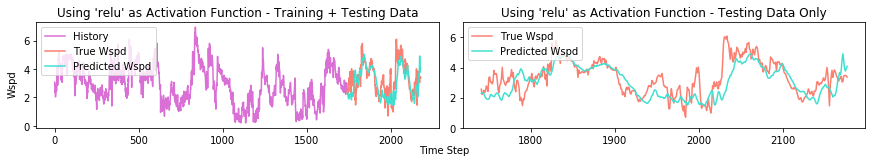

In [424]:
Title = "Using \'relu\' as Activation Function"
time = [i for i in range(2177)]

fig = plt.figure(figsize=(12, 2))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1])
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1])

axes = [ax0, ax1]


a = plt.gca()
a.set_ylim([0, 7])        
       
axes[0].plot(time[:1741], y_train1, label='History', color='orchid')
axes[0].plot(time[1741:], y_test4, label='True Wspd', color='salmon')
axes[0].plot(time[1741:], pred4, label='Predicted Wspd', color='turquoise')
       
axes[1].plot(time[1741:], y_test4, label='True Wspd', color='salmon')
axes[1].plot(time[1741:], pred4, label='Predicted Wspd', color='turquoise')
       
fig.tight_layout()
       
# Set labels
fig.text(0.5, 0.04, 'Time Step', ha='center', va='center')
fig.text(0, 0.5, 'Wspd', ha='center', va='center', rotation='vertical')

axes[0].set_title(Title + " - Training + Testing Data")
axes[1].set_title(Title + " - Testing Data Only")

ax0.legend(loc="upper left")
ax1.legend(loc="upper left")
plt.show()
plt.close()

In [540]:
mse4 = mean_squared_error(pred4, y_test4)
mse4

0.7421082437053854

## Model 5 - tanh activation function and adam optimizer - input size 40, prediction size 5 

In [240]:
numPoints, numFeatures = 40, 5

model5 = tf.keras.models.Sequential()
model5.add(tf.keras.layers.LSTM(256, return_sequences=True, input_shape=(numPoints, numFeatures)))
model5.add(tf.keras.layers.Dropout(rate=0.2))
model5.add(tf.keras.layers.LSTM(128, return_sequences=True))
model5.add(tf.keras.layers.Dropout(rate=0.2))
model5.add(tf.keras.layers.LSTM(64, activation='tanh'))
model5.add(tf.keras.layers.Dense(5))

optimizer=tf.keras.optimizers.RMSprop(lr=0.001, rho=0.9)

model5.compile(
        optimizer='adam', 
        loss='mae',
        metrics = ["accuracy"])

In [241]:
history5 = model5.fit(X_train_solo, y_train_solo, epochs = 50)

Epoch 1/50
1741/1741 [==============================] - 35s 20ms/sample - loss: 1.2583 - acc: 0.1626
Epoch 2/50
1741/1741 [==============================] - 34s 20ms/sample - loss: 1.0832 - acc: 0.1850
Epoch 3/50
1741/1741 [==============================] - 34s 20ms/sample - loss: 1.0841 - acc: 0.1901
Epoch 4/50
1741/1741 [==============================] - 34s 20ms/sample - loss: 1.0838 - acc: 0.1982
Epoch 5/50
1741/1741 [==============================] - 35s 20ms/sample - loss: 1.0851 - acc: 0.1964
Epoch 6/50
1741/1741 [==============================] - 35s 20ms/sample - loss: 1.0845 - acc: 0.1792
Epoch 7/50
1741/1741 [==============================] - 35s 20ms/sample - loss: 1.0877 - acc: 0.2108
Epoch 8/50
1741/1741 [==============================] - 36s 21ms/sample - loss: 1.0866 - acc: 0.2085
Epoch 9/50
1741/1741 [==============================] - 36s 21ms/sample - loss: 1.0862 - acc: 0.1947
Epoch 10/50
1741/1741 [==============================] - 36s 21ms/sample - loss: 1.0823 - a

In [246]:
pred5_raw = model5.predict(X_test_solo)

pred5 = []
for row in pred5_raw:
    pred5.append(row[0])
pred5 = np.array(pred5).reshape(-1,1)
pred5.shape

(436, 1)

In [247]:
y_test5 = []
for row in y_test_solo:
    y_test5.append(row[0])
y_test5 = np.array(y_test5).reshape(-1,1)
y_test5.shape

(436, 1)

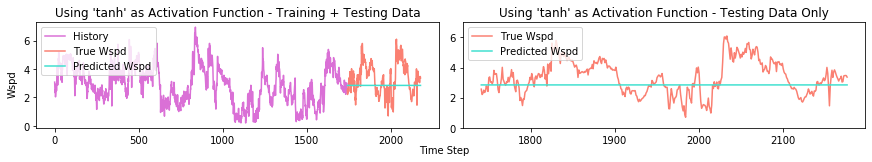

In [413]:
Title = "Using \'tanh\' as Activation Function"
time = [i for i in range(2177)]

fig = plt.figure(figsize=(12, 2))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1])
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1])

axes = [ax0, ax1]


a = plt.gca()
a.set_ylim([0, 7])        
       
axes[0].plot(time[:1741], y_train1, label='History', color='orchid')
axes[0].plot(time[1741:], y_test5, label='True Wspd', color='salmon')
axes[0].plot(time[1741:], pred5, label='Predicted Wspd', color='turquoise')
       
axes[1].plot(time[1741:], y_test5, label='True Wspd', color='salmon')
axes[1].plot(time[1741:], pred5, label='Predicted Wspd', color='turquoise')
       
fig.tight_layout()
       
# Set labels
fig.text(0.5, 0.04, 'Time Step', ha='center', va='center')
fig.text(0, 0.5, 'Wspd', ha='center', va='center', rotation='vertical')

axes[0].set_title(Title + " - Training + Testing Data")
axes[1].set_title(Title + " - Testing Data Only")

ax0.legend(loc="upper left")
ax1.legend(loc="upper left")
plt.show()
plt.close()

In [541]:
mse5 = mean_squared_error(pred5, y_test5)
mse5

1.43169942870126

## Model 6 - relu activation function and RMSProp optimizer - input size 40, prediction size 5

In [254]:
numPoints, numFeatures = 40, 5

model6 = tf.keras.models.Sequential()
model6.add(tf.keras.layers.LSTM(256, return_sequences=True, input_shape=(numPoints, numFeatures)))
model6.add(tf.keras.layers.Dropout(rate=0.2))
model6.add(tf.keras.layers.LSTM(128, return_sequences=True))
model6.add(tf.keras.layers.Dropout(rate=0.2))
model6.add(tf.keras.layers.LSTM(64, activation='relu'))
model6.add(tf.keras.layers.Dense(5))

optimizer=tf.keras.optimizers.RMSprop(lr=0.001, rho=0.9)

model6.compile(
        optimizer=optimizer,
        loss = 'mse',
        metrics = ["accuracy"])

In [255]:
history6 = model6.fit(X_train_solo, y_train_solo, epochs = 50)

Epoch 1/50
1741/1741 [==============================] - 39s 22ms/sample - loss: 10062.5311 - acc: 0.1482
Epoch 2/50
1741/1741 [==============================] - 38s 22ms/sample - loss: 3951.9121 - acc: 0.1700
Epoch 3/50
1741/1741 [==============================] - 39s 22ms/sample - loss: 40.0472 - acc: 0.1683
Epoch 4/50
1741/1741 [==============================] - 40s 23ms/sample - loss: 4.3064 - acc: 0.1901
Epoch 5/50
1741/1741 [==============================] - 40s 23ms/sample - loss: 3.6454 - acc: 0.1804
Epoch 6/50
1741/1741 [==============================] - 40s 23ms/sample - loss: 6.1902 - acc: 0.2935
Epoch 7/50
1741/1741 [==============================] - 42s 24ms/sample - loss: 2.2760 - acc: 0.2246
Epoch 8/50
1741/1741 [==============================] - 42s 24ms/sample - loss: 1.7976 - acc: 0.2206
Epoch 9/50
1741/1741 [==============================] - 40s 23ms/sample - loss: 1.4584 - acc: 0.2183
Epoch 10/50
1741/1741 [==============================] - 40s 23ms/sample - loss: 1.

In [256]:
pred6_raw = model6.predict(X_test_solo)

pred6 = []
for row in pred6_raw:
    pred6.append(row[0])
pred6 = np.array(pred6).reshape(-1,1)
pred6.shape

(436, 1)

In [257]:
y_test6 = []
for row in y_test_solo:
    y_test6.append(row[0])
y_test6 = np.array(y_test6).reshape(-1,1)
y_test6.shape

(436, 1)

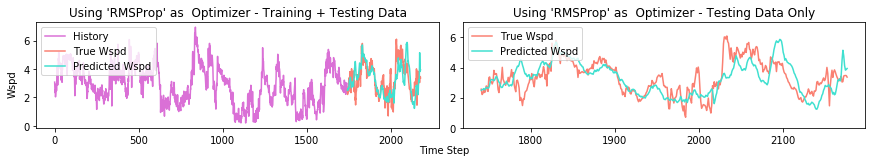

In [411]:
Title = "Using \'RMSProp\' as  Optimizer"
time = [i for i in range(2177)]

fig = plt.figure(figsize=(12, 2))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1])
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1])

axes = [ax0, ax1]


a = plt.gca()
a.set_ylim([0, 7])        
       
axes[0].plot(time[:1741], y_train1, label='History', color='orchid')
axes[0].plot(time[1741:], y_test6, label='True Wspd', color='salmon')
axes[0].plot(time[1741:], pred6, label='Predicted Wspd', color='turquoise')
       
axes[1].plot(time[1741:], y_test6, label='True Wspd', color='salmon')
axes[1].plot(time[1741:], pred6, label='Predicted Wspd', color='turquoise')
       
fig.tight_layout()
       
# Set labels
fig.text(0.5, 0.04, 'Time Step', ha='center', va='center')
fig.text(0, 0.5, 'Wspd', ha='center', va='center', rotation='vertical')

axes[0].set_title(Title + " - Training + Testing Data")
axes[1].set_title(Title + " - Testing Data Only")

ax0.legend(loc="upper left")
ax1.legend(loc="upper left")
plt.show()
plt.close()

In [542]:
mse6 = mean_squared_error(pred6, y_test6)
mse6

0.7356557832207544

# Necessity for Scaler

## Model 7 - Without Scaler - input size 40, prediction size 5

In [339]:
numPoints, numFeatures = 40, 5

model7 = tf.keras.models.Sequential()
model7.add(tf.keras.layers.LSTM(256, return_sequences=True, input_shape=(numPoints, numFeatures)))
model7.add(tf.keras.layers.Dropout(rate=0.2))
model7.add(tf.keras.layers.LSTM(128, return_sequences=True))
model7.add(tf.keras.layers.Dropout(rate=0.2))
model7.add(tf.keras.layers.LSTM(64, return_sequences=True))
model7.add(tf.keras.layers.Dropout(rate=0.2))
model7.add(tf.keras.layers.LSTM(32, activation='relu'))
model7.add(tf.keras.layers.Dense(5))

model7.compile(
        optimizer='adam',
        loss = 'mse',
        metrics = ["accuracy"])

In [340]:
history7 = model7.fit(X_train_solo, y_train_solo, epochs = 50)

Epoch 1/50
1741/1741 [==============================] - 41s 24ms/sample - loss: 3.7062 - acc: 0.2430
Epoch 2/50
1741/1741 [==============================] - 39s 22ms/sample - loss: 1.5475 - acc: 0.2091
Epoch 3/50
1741/1741 [==============================] - 39s 22ms/sample - loss: 1.2812 - acc: 0.1987
Epoch 4/50
1741/1741 [==============================] - 39s 22ms/sample - loss: 1.0099 - acc: 0.1884
Epoch 5/50
1741/1741 [==============================] - 39s 23ms/sample - loss: 0.9922 - acc: 0.1855
Epoch 6/50
1741/1741 [==============================] - 39s 22ms/sample - loss: 0.8835 - acc: 0.2211
Epoch 7/50
1741/1741 [==============================] - 41s 24ms/sample - loss: 0.8257 - acc: 0.1993
Epoch 8/50
1741/1741 [==============================] - 42s 24ms/sample - loss: 0.7727 - acc: 0.1895
Epoch 9/50
1741/1741 [==============================] - 43s 25ms/sample - loss: 0.7634 - acc: 0.1970
Epoch 10/50
1741/1741 [==============================] - 43s 25ms/sample - loss: 0.7505 - a

In [341]:
pred7_raw = model7.predict(X_test_solo)

pred7 = []
for row in pred7_raw:
    pred7.append(row[0])
pred7 = np.array(pred7).reshape(-1,1)
pred7.shape

(436, 1)

In [343]:
y_test7 = []
for row in y_test_solo:
    y_test7.append(row[0])
y_test7 = np.array(y_test7).reshape(-1,1)
y_test7.shape

(436, 1)

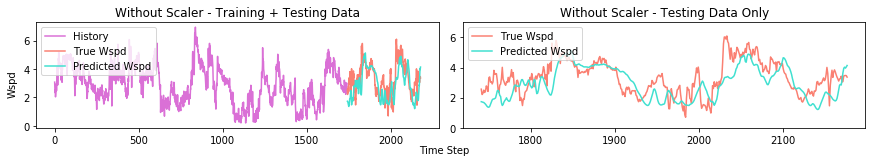

In [410]:
Title = "Without Scaler"
time = [i for i in range(2177)]

fig = plt.figure(figsize=(12, 2))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1])
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1])

axes = [ax0, ax1]


a = plt.gca()
a.set_ylim([0, 7])        
       
axes[0].plot(time[:1741], y_train1, label='History', color='orchid')
axes[0].plot(time[1741:], y_test7, label='True Wspd', color='salmon')
axes[0].plot(time[1741:], pred7, label='Predicted Wspd', color='turquoise')
       
axes[1].plot(time[1741:], y_test7, label='True Wspd', color='salmon')
axes[1].plot(time[1741:], pred7, label='Predicted Wspd', color='turquoise')
       
fig.tight_layout()
       
# Set labels
fig.text(0.5, 0.04, 'Time Step', ha='center', va='center')
fig.text(0, 0.5, 'Wspd', ha='center', va='center', rotation='vertical')

axes[0].set_title(Title + " - Training + Testing Data")
axes[1].set_title(Title + " - Testing Data Only")

ax0.legend(loc="upper left")
ax1.legend(loc="upper left")
plt.show()
plt.close()

In [543]:
mse7 = mean_squared_error(pred7, y_test7)
mse7

0.9976685551504428

## Model 8 - With Scaler on Both X and y Variables - input size 40, prediction size 5

In [365]:
numPoints, numFeatures = 40, 5

model8 = tf.keras.models.Sequential()
model8.add(tf.keras.layers.LSTM(256, return_sequences=True, input_shape=(numPoints, numFeatures)))
model8.add(tf.keras.layers.Dropout(rate=0.2))
model8.add(tf.keras.layers.LSTM(128, return_sequences=True))
model8.add(tf.keras.layers.Dropout(rate=0.2))
model8.add(tf.keras.layers.LSTM(64, return_sequences=True))
model8.add(tf.keras.layers.Dropout(rate=0.2))
model8.add(tf.keras.layers.LSTM(32, activation='relu'))
model8.add(tf.keras.layers.Dense(5))

model8.compile(
        optimizer='adam',
        loss = 'mse',
        metrics = ["accuracy"])

In [366]:
history8 = model8.fit(X_train_solo, y_train_solo, epochs = 50)

Epoch 1/50
1741/1741 [==============================] - 49s 28ms/sample - loss: 0.0365 - acc: 0.1872
Epoch 2/50
1741/1741 [==============================] - 47s 27ms/sample - loss: 0.0182 - acc: 0.2194
Epoch 3/50
1741/1741 [==============================] - 46s 27ms/sample - loss: 0.0176 - acc: 0.1999
Epoch 4/50
1741/1741 [==============================] - 47s 27ms/sample - loss: 0.0167 - acc: 0.1987
Epoch 5/50
1741/1741 [==============================] - 47s 27ms/sample - loss: 0.0151 - acc: 0.2108
Epoch 6/50
1741/1741 [==============================] - 47s 27ms/sample - loss: 0.0150 - acc: 0.2091
Epoch 7/50
1741/1741 [==============================] - 48s 28ms/sample - loss: 0.0143 - acc: 0.2010
Epoch 8/50
1741/1741 [==============================] - 48s 27ms/sample - loss: 0.0137 - acc: 0.2056
Epoch 9/50
1741/1741 [==============================] - 48s 28ms/sample - loss: 0.0132 - acc: 0.2045
Epoch 10/50
1741/1741 [==============================] - 49s 28ms/sample - loss: 0.0138 - a

In [376]:
pred8_raw = model8.predict(X_test_solo)
pred8_raw = scaler.inverse_transform(pred8_raw)
pred8 = []
for row in pred8_raw:
    pred8.append(row[0])
pred8 = np.array(pred8).reshape(-1,1)
pred8.shape

(436, 1)

In [377]:
y_test8 = []
y_test_solo_inversed = scaler.inverse_transform(y_test_solo)
for row in y_test_solo_inversed:
    y_test8.append(row[0])

y_test8 = np.array(y_test8).reshape(-1,1)
y_test8.shape

(436, 1)

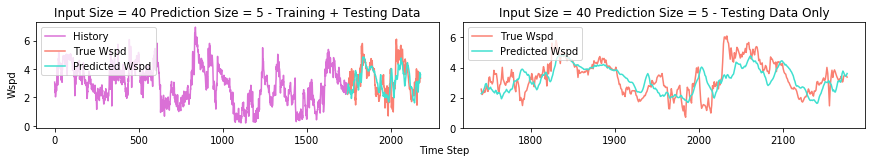

In [425]:
Title = "Input Size = 40 Prediction Size = 5"
time = [i for i in range(2177)]

fig = plt.figure(figsize=(12, 2))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1])
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1])

axes = [ax0, ax1]


a = plt.gca()
a.set_ylim([0, 7])        
       
axes[0].plot(time[:1741], y_train1, label='History', color='orchid')
axes[0].plot(time[1741:], y_test8, label='True Wspd', color='salmon')
axes[0].plot(time[1741:], pred8, label='Predicted Wspd', color='turquoise')
       
axes[1].plot(time[1741:], y_test8, label='True Wspd', color='salmon')
axes[1].plot(time[1741:], pred8, label='Predicted Wspd', color='turquoise')
       
fig.tight_layout()
       
# Set labels
fig.text(0.5, 0.04, 'Time Step', ha='center', va='center')
fig.text(0, 0.5, 'Wspd', ha='center', va='center', rotation='vertical')

axes[0].set_title(Title + " - Training + Testing Data")
axes[1].set_title(Title + " - Testing Data Only")

ax0.legend(loc="upper left")
ax1.legend(loc="upper left")
plt.show()
plt.close()
        


In [544]:
mse8 = mean_squared_error(pred8, y_test8)
mse8

0.7354899365103492

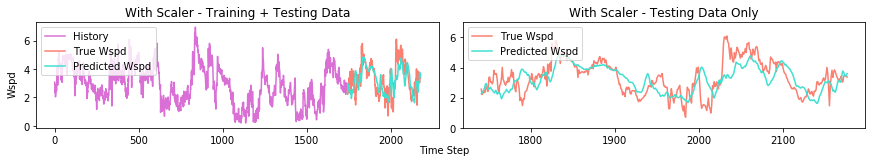

In [426]:
Title = "With Scaler"
time = [i for i in range(2177)]

fig = plt.figure(figsize=(12, 2))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1])
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1])

axes = [ax0, ax1]


a = plt.gca()
a.set_ylim([0, 7])        
       
axes[0].plot(time[:1741], y_train1, label='History', color='orchid')
axes[0].plot(time[1741:], y_test8, label='True Wspd', color='salmon')
axes[0].plot(time[1741:], pred8, label='Predicted Wspd', color='turquoise')
       
axes[1].plot(time[1741:], y_test8, label='True Wspd', color='salmon')
axes[1].plot(time[1741:], pred8, label='Predicted Wspd', color='turquoise')
       
fig.tight_layout()
       
# Set labels
fig.text(0.5, 0.04, 'Time Step', ha='center', va='center')
fig.text(0, 0.5, 'Wspd', ha='center', va='center', rotation='vertical')

axes[0].set_title(Title + " - Training + Testing Data")
axes[1].set_title(Title + " - Testing Data Only")

ax0.legend(loc="upper left")
ax1.legend(loc="upper left")
plt.show()
plt.close()

## Only Scale the X Variables - input size 40, prediction size 5

In [525]:
numPoints, numFeatures = 40, 5

model82 = tf.keras.models.Sequential()
model82.add(tf.keras.layers.LSTM(256, return_sequences=True, input_shape=(numPoints, numFeatures)))
model82.add(tf.keras.layers.Dropout(rate=0.2))
model82.add(tf.keras.layers.LSTM(128, return_sequences=True))
model82.add(tf.keras.layers.Dropout(rate=0.2))
model82.add(tf.keras.layers.LSTM(64, return_sequences=True))
model82.add(tf.keras.layers.Dropout(rate=0.2))
model82.add(tf.keras.layers.LSTM(32, activation='relu'))
model82.add(tf.keras.layers.Dense(5))

model82.compile(
        optimizer='adam',
        loss = 'mse',
        metrics = ["accuracy"])

In [526]:
history82 = model82.fit(X_train_solo, y_train_solo, epochs = 50)

Epoch 1/50
1741/1741 [==============================] - 63s 36ms/sample - loss: 2.6470 - acc: 0.2263
Epoch 2/50
1741/1741 [==============================] - 58s 33ms/sample - loss: 1.7897 - acc: 0.2119
Epoch 3/50
1741/1741 [==============================] - 58s 33ms/sample - loss: 1.7821 - acc: 0.2165
Epoch 4/50
1741/1741 [==============================] - 60s 35ms/sample - loss: 1.7450 - acc: 0.2005
Epoch 5/50
1741/1741 [==============================] - 62s 36ms/sample - loss: 1.7577 - acc: 0.2056
Epoch 6/50
1741/1741 [==============================] - 62s 35ms/sample - loss: 1.7299 - acc: 0.2062
Epoch 7/50
1741/1741 [==============================] - 63s 36ms/sample - loss: 1.7325 - acc: 0.1976
Epoch 8/50
1741/1741 [==============================] - 63s 36ms/sample - loss: 1.7204 - acc: 0.1953
Epoch 9/50
1741/1741 [==============================] - 63s 36ms/sample - loss: 1.7353 - acc: 0.2085
Epoch 10/50
1741/1741 [==============================] - 67s 38ms/sample - loss: 1.7206 - a

In [531]:
pred82_raw = model82.predict(X_test_solo)
pred82 = []
for row in pred82_raw:
    pred82.append(row[0])
pred82 = np.array(pred82).reshape(-1,1)
pred82.shape

(436, 1)

In [532]:
y_test82 = []

for row in y_test_solo:
    y_test82.append(row[0])

y_test82 = np.array(y_test82).reshape(-1,1)
y_test82.shape

(436, 1)

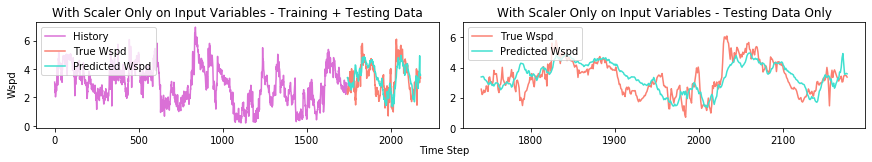

In [533]:
Title = "With Scaler Only on Input Variables"
time = [i for i in range(2177)]

fig = plt.figure(figsize=(12, 2))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1])
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1])

axes = [ax0, ax1]


a = plt.gca()
a.set_ylim([0, 7])        
       
axes[0].plot(time[:1741], y_train1, label='History', color='orchid')
axes[0].plot(time[1741:], y_test82, label='True Wspd', color='salmon')
axes[0].plot(time[1741:], pred82, label='Predicted Wspd', color='turquoise')
       
axes[1].plot(time[1741:], y_test82, label='True Wspd', color='salmon')
axes[1].plot(time[1741:], pred82, label='Predicted Wspd', color='turquoise')
       
fig.tight_layout()
       
# Set labels
fig.text(0.5, 0.04, 'Time Step', ha='center', va='center')
fig.text(0, 0.5, 'Wspd', ha='center', va='center', rotation='vertical')

axes[0].set_title(Title + " - Training + Testing Data")
axes[1].set_title(Title + " - Testing Data Only")

ax0.legend(loc="upper left")
ax1.legend(loc="upper left")
plt.show()
plt.close()

In [546]:
mse82 = mean_squared_error(pred82, y_test82)
mse82

0.6104423988614799

# Observation Size and Prediction Size

## Model 9 - 20 input size and 5 prediction size

In [394]:
numPoints, numFeatures = 20, 5

model9 = tf.keras.models.Sequential()
model9.add(tf.keras.layers.LSTM(256, return_sequences=True, input_shape=(numPoints, numFeatures)))
model9.add(tf.keras.layers.Dropout(rate=0.2))
model9.add(tf.keras.layers.LSTM(128, return_sequences=True))
model9.add(tf.keras.layers.Dropout(rate=0.2))
model9.add(tf.keras.layers.LSTM(64, return_sequences=True))
model9.add(tf.keras.layers.Dropout(rate=0.2))
model9.add(tf.keras.layers.LSTM(32, activation='relu'))
model9.add(tf.keras.layers.Dense(5))

model9.compile(
        optimizer='adam',
        loss = 'mse',
        metrics = ["accuracy"])

In [395]:
history9 = model9.fit(X_train_solo, y_train_solo, epochs = 50)

Epoch 1/50
1757/1757 [==============================] - 31s 18ms/sample - loss: 0.0421 - acc: 0.2163
Epoch 2/50
1757/1757 [==============================] - 28s 16ms/sample - loss: 0.0200 - acc: 0.2322
Epoch 3/50
1757/1757 [==============================] - 28s 16ms/sample - loss: 0.0175 - acc: 0.2231
Epoch 4/50
1757/1757 [==============================] - 29s 17ms/sample - loss: 0.0174 - acc: 0.2060
Epoch 5/50
1757/1757 [==============================] - 27s 15ms/sample - loss: 0.0162 - acc: 0.2157
Epoch 6/50
1757/1757 [==============================] - 27s 15ms/sample - loss: 0.0154 - acc: 0.2231
Epoch 7/50
1757/1757 [==============================] - 27s 15ms/sample - loss: 0.0148 - acc: 0.2094
Epoch 8/50
1757/1757 [==============================] - 27s 15ms/sample - loss: 0.0147 - acc: 0.2083
Epoch 9/50
1757/1757 [==============================] - 27s 15ms/sample - loss: 0.0138 - acc: 0.2117
Epoch 10/50
1757/1757 [==============================] - 27s 15ms/sample - loss: 0.0145 - a

In [399]:
pred9_raw = model9.predict(X_test_solo)
pred9_raw = scaler.inverse_transform(pred9_raw)
pred9 = []
for row in pred9_raw:
    pred9.append(row[0])
pred9 = np.array(pred9).reshape(-1,1)
pred9.shape

(440, 1)

In [397]:
y_test9 = []
y_test_solo_inversed = scaler.inverse_transform(y_test_solo)
for row in y_test_solo_inversed:
    y_test9.append(row[0])

y_test9 = np.array(y_test9).reshape(-1,1)
y_test9.shape

(440, 1)

In [401]:
y_train9 = []
y_train_solo_inversed = scaler.inverse_transform(y_train_solo)
for row in y_train_solo_inversed:
    y_train9.append(row[0])

y_train9 = np.array(y_train9).reshape(-1,1)
y_train9.shape

(1757, 1)

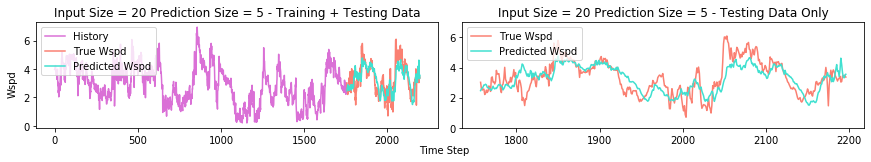

In [407]:
Title = "Input Size = 20 Prediction Size = 5"
time = [i for i in range(2197)]

fig = plt.figure(figsize=(12, 2))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1])
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1])

axes = [ax0, ax1]


a = plt.gca()
a.set_ylim([0, 7])        
       
axes[0].plot(time[:1757], y_train9, label='History', color='orchid')
axes[0].plot(time[1757:], y_test9, label='True Wspd', color='salmon')
axes[0].plot(time[1757:], pred9, label='Predicted Wspd', color='turquoise')
       
axes[1].plot(time[1757:], y_test9, label='True Wspd', color='salmon')
axes[1].plot(time[1757:], pred9, label='Predicted Wspd', color='turquoise')
       
fig.tight_layout()
       
# Set labels
fig.text(0.5, 0.04, 'Time Step', ha='center', va='center')
fig.text(0, 0.5, 'Wspd', ha='center', va='center', rotation='vertical')

axes[0].set_title(Title + " - Training + Testing Data")
axes[1].set_title(Title + " - Testing Data Only")

ax0.legend(loc="upper left")
ax1.legend(loc="upper left")
plt.show()
plt.close()
        


In [547]:
mse9 = mean_squared_error(pred9, y_test9)
mse9

0.5363091745351635

## Input size 10, Prediction size 5

In [1032]:
numPoints, numFeatures = 10, 5

model92 = tf.keras.models.Sequential()
model92.add(tf.keras.layers.LSTM(256, return_sequences=True, input_shape=(numPoints, numFeatures)))
model92.add(tf.keras.layers.Dropout(rate=0.2))
model92.add(tf.keras.layers.LSTM(128, return_sequences=True))
model92.add(tf.keras.layers.Dropout(rate=0.2))
model92.add(tf.keras.layers.LSTM(64, return_sequences=True))
model92.add(tf.keras.layers.Dropout(rate=0.2))
model92.add(tf.keras.layers.LSTM(32, activation='relu'))
model92.add(tf.keras.layers.Dense(5))

model92.compile(
        optimizer='adam',
        loss = 'mse',
        metrics = ["accuracy"])

In [1033]:
history92 = model92.fit(X_train_solo, y_train_solo, epochs = 50)

Epoch 1/50
1765/1765 [==============================] - 32s 18ms/sample - loss: 3.0930 - acc: 0.2057
Epoch 2/50
1765/1765 [==============================] - 27s 15ms/sample - loss: 0.9328 - acc: 0.2198
Epoch 3/50
1765/1765 [==============================] - 27s 15ms/sample - loss: 0.8506 - acc: 0.2357
Epoch 4/50
1765/1765 [==============================] - 27s 15ms/sample - loss: 0.8145 - acc: 0.2351
Epoch 5/50
1765/1765 [==============================] - 27s 15ms/sample - loss: 0.8220 - acc: 0.2436
Epoch 6/50
1765/1765 [==============================] - 27s 15ms/sample - loss: 0.7913 - acc: 0.2300
Epoch 7/50
1765/1765 [==============================] - 27s 15ms/sample - loss: 0.7376 - acc: 0.2368
Epoch 8/50
1765/1765 [==============================] - 27s 15ms/sample - loss: 0.7167 - acc: 0.2244
Epoch 9/50
1765/1765 [==============================] - 27s 15ms/sample - loss: 0.7009 - acc: 0.2414
Epoch 10/50
1765/1765 [==============================] - 27s 15ms/sample - loss: 0.7287 - a

In [1044]:
pred92_raw = model92.predict(X_test_solo)

pred92 = []
for row in pred92_raw:
    pred92.append(row[0])
pred92 = np.array(pred92).reshape(-1,1)
pred92.shape

(442, 1)

In [1048]:
y_test92 = []

for row in y_test_solo:
    y_test92.append(row[0])

y_test92 = np.array(y_test92).reshape(-1,1)
y_test92.shape

(442, 1)

In [1049]:
y_train92 = []

for row in y_train_solo:
    y_train92.append(row[0])

y_train92 = np.array(y_train92).reshape(-1,1)
y_train92.shape

(1765, 1)

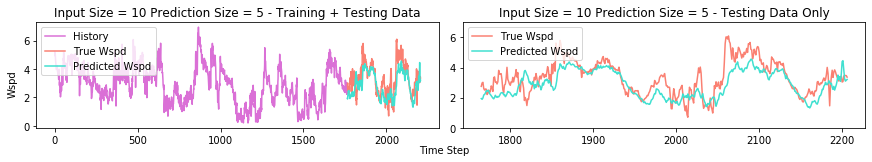

In [1050]:
Title = "Input Size = 10 Prediction Size = 5"
time = [i for i in range(2207)]

fig = plt.figure(figsize=(12, 2))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1])
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1])

axes = [ax0, ax1]


a = plt.gca()
a.set_ylim([0, 7])        
       
axes[0].plot(time[:1765], y_train92, label='History', color='orchid')
axes[0].plot(time[1765:], y_test92, label='True Wspd', color='salmon')
axes[0].plot(time[1765:], pred92, label='Predicted Wspd', color='turquoise')
       
axes[1].plot(time[1765:], y_test92, label='True Wspd', color='salmon')
axes[1].plot(time[1765:], pred92, label='Predicted Wspd', color='turquoise')
       
fig.tight_layout()
       
# Set labels
fig.text(0.5, 0.04, 'Time Step', ha='center', va='center')
fig.text(0, 0.5, 'Wspd', ha='center', va='center', rotation='vertical')

axes[0].set_title(Title + " - Training + Testing Data")
axes[1].set_title(Title + " - Testing Data Only")

ax0.legend(loc="upper left")
ax1.legend(loc="upper left")
plt.show()
plt.close()

In [1051]:
mse92 = mean_squared_error(pred92, y_test92)
mse92

0.7120948043775472

## Input Size 10, Prediection Size 1

In [1066]:
numPoints, numFeatures = 10, 5

model93 = tf.keras.models.Sequential()
model93.add(tf.keras.layers.LSTM(256, return_sequences=True, input_shape=(numPoints, numFeatures)))
model93.add(tf.keras.layers.Dropout(rate=0.2))
model93.add(tf.keras.layers.LSTM(128, return_sequences=True))
model93.add(tf.keras.layers.Dropout(rate=0.2))
model93.add(tf.keras.layers.LSTM(64, return_sequences=True))
model93.add(tf.keras.layers.Dropout(rate=0.2))
model93.add(tf.keras.layers.LSTM(32, activation='relu'))
model93.add(tf.keras.layers.Dense(1))

model93.compile(
        optimizer='adam',
        loss = 'mse',
        metrics = ["accuracy"])

In [1069]:
history93 = model93.fit(X_train_solo, y_train_solo, epochs = 50)

Epoch 1/50
1768/1768 [==============================] - 34s 19ms/sample - loss: 2.6367 - acc: 0.0000e+00
Epoch 2/50
1768/1768 [==============================] - 28s 16ms/sample - loss: 0.8581 - acc: 0.0000e+00
Epoch 3/50
1768/1768 [==============================] - 27s 15ms/sample - loss: 0.7563 - acc: 0.0000e+00
Epoch 4/50
1768/1768 [==============================] - 27s 15ms/sample - loss: 0.7180 - acc: 0.0000e+00
Epoch 5/50
1768/1768 [==============================] - 27s 15ms/sample - loss: 0.7218 - acc: 0.0000e+00
Epoch 6/50
1768/1768 [==============================] - 27s 15ms/sample - loss: 0.7460 - acc: 0.0000e+00
Epoch 7/50
1768/1768 [==============================] - 27s 15ms/sample - loss: 0.6849 - acc: 0.0000e+00
Epoch 8/50
1768/1768 [==============================] - 28s 16ms/sample - loss: 0.6479 - acc: 0.0000e+00
Epoch 9/50
1768/1768 [==============================] - 27s 15ms/sample - loss: 0.6733 - acc: 0.0000e+00
Epoch 10/50
1768/1768 [==============================] 

## Model 10 - Input size 60, Prediction size 5

In [442]:
numPoints, numFeatures = 60, 5

model10 = tf.keras.models.Sequential()
model10.add(tf.keras.layers.LSTM(256, return_sequences=True, input_shape=(numPoints, numFeatures)))
model10.add(tf.keras.layers.Dropout(rate=0.2))
model10.add(tf.keras.layers.LSTM(128, return_sequences=True))
model10.add(tf.keras.layers.Dropout(rate=0.2))
model10.add(tf.keras.layers.LSTM(64, return_sequences=True))
model10.add(tf.keras.layers.Dropout(rate=0.2))
model10.add(tf.keras.layers.LSTM(32, activation='relu'))
model10.add(tf.keras.layers.Dense(5))

model10.compile(
        optimizer='adam',
        loss = 'mse',
        metrics = ["accuracy"])

In [443]:
history10 = model10.fit(X_train_solo, y_train_solo, epochs = 50)

Epoch 1/50
1725/1725 [==============================] - 70s 41ms/sample - loss: 0.0395 - acc: 0.2099
Epoch 2/50
1725/1725 [==============================] - 69s 40ms/sample - loss: 0.0190 - acc: 0.2058
Epoch 3/50
1725/1725 [==============================] - 71s 41ms/sample - loss: 0.0170 - acc: 0.2035
Epoch 4/50
1725/1725 [==============================] - 71s 41ms/sample - loss: 0.0164 - acc: 0.2006
Epoch 5/50
1725/1725 [==============================] - 71s 41ms/sample - loss: 0.0157 - acc: 0.2197
Epoch 6/50
1725/1725 [==============================] - 74s 43ms/sample - loss: 0.0154 - acc: 0.1977
Epoch 7/50
1725/1725 [==============================] - 74s 43ms/sample - loss: 0.0151 - acc: 0.2272
Epoch 8/50
1725/1725 [==============================] - 75s 43ms/sample - loss: 0.0148 - acc: 0.2232
Epoch 9/50
1725/1725 [==============================] - 75s 44ms/sample - loss: 0.0141 - acc: 0.2214
Epoch 10/50
1725/1725 [==============================] - 76s 44ms/sample - loss: 0.0135 - a

In [444]:
pred10_raw = model10.predict(X_test_solo)
pred10_raw = scaler.inverse_transform(pred10_raw)
pred10 = []
for row in pred10_raw:
    pred10.append(row[0])
pred10 = np.array(pred10).reshape(-1,1)
pred10.shape

(432, 1)

In [445]:
y_test10 = []
y_test_solo_inversed = scaler.inverse_transform(y_test_solo)
for row in y_test_solo_inversed:
    y_test10.append(row[0])

y_test10 = np.array(y_test10).reshape(-1,1)
y_test10.shape

(432, 1)

In [446]:
y_train10 = []
y_train_solo_inversed = scaler.inverse_transform(y_train_solo)
for row in y_train_solo_inversed:
    y_train10.append(row[0])

y_train10 = np.array(y_train10).reshape(-1,1)
y_train10.shape

(1725, 1)

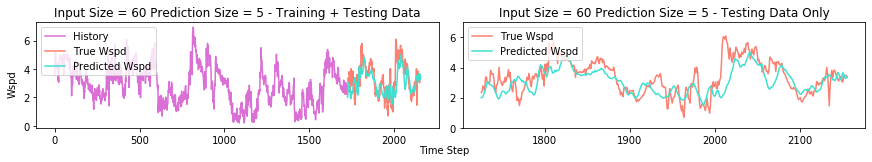

In [449]:
Title = "Input Size = 60 Prediction Size = 5"
time = [i for i in range(2157)]

fig = plt.figure(figsize=(12, 2))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1])
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1])

axes = [ax0, ax1]


a = plt.gca()
a.set_ylim([0, 7])        
       
axes[0].plot(time[:1725], y_train10, label='History', color='orchid')
axes[0].plot(time[1725:], y_test10, label='True Wspd', color='salmon')
axes[0].plot(time[1725:], pred10, label='Predicted Wspd', color='turquoise')
       
axes[1].plot(time[1725:], y_test10, label='True Wspd', color='salmon')
axes[1].plot(time[1725:], pred10, label='Predicted Wspd', color='turquoise')
       
fig.tight_layout()
       
# Set labels
fig.text(0.5, 0.04, 'Time Step', ha='center', va='center')
fig.text(0, 0.5, 'Wspd', ha='center', va='center', rotation='vertical')

axes[0].set_title(Title + " - Training + Testing Data")
axes[1].set_title(Title + " - Testing Data Only")

ax0.legend(loc="upper left")
ax1.legend(loc="upper left")
plt.show()
plt.close()

In [579]:
mse10 = mean_squared_error(pred10, y_test10)
mse10

0.7205817507474962

## Model 11 - Input Size 40, Prediction Size 1

In [487]:
numPoints, numFeatures = 40, 5

model11 = tf.keras.models.Sequential()
model11.add(tf.keras.layers.LSTM(256, return_sequences=True, input_shape=(numPoints, numFeatures)))
model11.add(tf.keras.layers.Dropout(rate=0.2))
model11.add(tf.keras.layers.LSTM(128, return_sequences=True))
model11.add(tf.keras.layers.Dropout(rate=0.2))
model11.add(tf.keras.layers.LSTM(64, return_sequences=True))
model11.add(tf.keras.layers.Dropout(rate=0.2))
model11.add(tf.keras.layers.LSTM(32, activation='relu'))
model11.add(tf.keras.layers.Dense(1))

model11.compile(
        optimizer='adam',
        loss = 'mse',
        metrics = ["accuracy"])

In [488]:
history11 = model11.fit(X_train_solo, y_train_solo, epochs = 50)

Epoch 1/50
1744/1744 [==============================] - 64s 37ms/sample - loss: 0.0363 - acc: 5.7339e-04
Epoch 2/50
1744/1744 [==============================] - 57s 33ms/sample - loss: 0.0177 - acc: 0.0011
Epoch 3/50
1744/1744 [==============================] - 59s 34ms/sample - loss: 0.0158 - acc: 0.0011
Epoch 4/50
1744/1744 [==============================] - 60s 35ms/sample - loss: 0.0152 - acc: 0.0011
Epoch 5/50
1744/1744 [==============================] - 60s 35ms/sample - loss: 0.0146 - acc: 0.0011
Epoch 6/50
1744/1744 [==============================] - 60s 35ms/sample - loss: 0.0138 - acc: 0.0011
Epoch 7/50
1744/1744 [==============================] - 60s 35ms/sample - loss: 0.0133 - acc: 0.0011
Epoch 8/50
1744/1744 [==============================] - 61s 35ms/sample - loss: 0.0128 - acc: 0.0011
Epoch 9/50
1744/1744 [==============================] - 63s 36ms/sample - loss: 0.0123 - acc: 0.0011
Epoch 10/50
1744/1744 [==============================] - 62s 35ms/sample - loss: 0.0120

In [489]:
pred11_raw = model11.predict(X_test_solo)
pred11_raw = scaler.inverse_transform(pred11_raw)
pred11 = []
for row in pred11_raw:
    pred11.append(row[0])
pred11 = np.array(pred11).reshape(-1,1)
pred11.shape

(437, 1)

In [491]:
y_test11 = []
y_test_solo_inversed = scaler.inverse_transform(y_test_solo)
for row in y_test_solo_inversed:
    y_test11.append(row[0])

y_test11 = np.array(y_test11).reshape(-1,1)
y_test11.shape

(437, 1)

In [492]:
y_train11 = []
y_train_solo_inversed = scaler.inverse_transform(y_train_solo)
for row in y_train_solo_inversed:
    y_train11.append(row[0])

y_train11 = np.array(y_train11).reshape(-1,1)
y_train11.shape

(1744, 1)

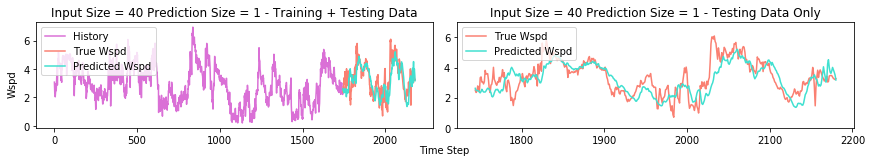

In [493]:
Title = "Input Size = 40 Prediction Size = 1"
time = [i for i in range(2181)]

fig = plt.figure(figsize=(12, 2))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1])
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1])

axes = [ax0, ax1]


a = plt.gca()
a.set_ylim([0, 7])        
       
axes[0].plot(time[:1744], y_train11, label='History', color='orchid')
axes[0].plot(time[1744:], y_test11, label='True Wspd', color='salmon')
axes[0].plot(time[1744:], pred11, label='Predicted Wspd', color='turquoise')
       
axes[1].plot(time[1744:], y_test11, label='True Wspd', color='salmon')
axes[1].plot(time[1744:], pred11, label='Predicted Wspd', color='turquoise')
       
fig.tight_layout()
       
# Set labels
fig.text(0.5, 0.04, 'Time Step', ha='center', va='center')
fig.text(0, 0.5, 'Wspd', ha='center', va='center', rotation='vertical')

axes[0].set_title(Title + " - Training + Testing Data")
axes[1].set_title(Title + " - Testing Data Only")

ax0.legend(loc="upper left")
ax1.legend(loc="upper left")
plt.show()
plt.close()

In [550]:
mse11 = mean_squared_error(pred11, y_test11)
mse11

0.600668224601154

# Import Old Sold Data

In [146]:
# import packages
import pandas as pd
import numpy as np

In [580]:
# Upload Wind Data
WINDFILE_1828_PATH = "https://raw.githubusercontent.com/SophiaCheung1211/Using_Drone_to_Predict_Wind_Speed/master/Wind_Data/SOLO/Dat1828.csv"
WINDFILE_1928_PATH = "https://raw.githubusercontent.com/SophiaCheung1211/Using_Drone_to_Predict_Wind_Speed/master/Wind_Data/SOLO/Dat1928.csv"
WINDFILE_2023_PATH = "https://raw.githubusercontent.com/SophiaCheung1211/Using_Drone_to_Predict_Wind_Speed/master/Wind_Data/SOLO/Dat2023.csv"
wind_data_1828 = pd.read_csv(WINDFILE_1828_PATH)
wind_data_1928 = pd.read_csv(WINDFILE_1928_PATH) 
wind_data_2023 = pd.read_csv(WINDFILE_2023_PATH)


# Description of the data frame
# print(wind_data_1828.shape)
# print(wind_data_1928.shape)
# print(wind_data_2023.shape)
# wind_data_1828

In [581]:
# subset useful features in wind data 
wind_data_1828_useful = wind_data_1828[['Logfile', 'date', 'wdir', 'wspd']]
wind_data_1928_useful = wind_data_1928[['Logfile', 'date', 'wdir', 'wspd']]
wind_data_2023_useful = wind_data_2023[['Logfile', 'date', 'wdir', 'wspd']]


In [582]:
# Upload Drone Data
DRONEFILE_20180605_PATH = "2018-06-05 18-03-18.log"
DRONEFILE_RECENT3_PATH = "RECENT-3.log"
DRONEFILE_RECENT4_PATH = "RECENT-4.log"
DRONEFILE_RECENT6_PATH = "RECENT-6.log"

In [650]:
# Data Cleaning for file 18-03-18.log

raw_data_20180605 = open(DRONEFILE_20180605_PATH, 'r')


# Storing different types of line into different lists
GPS_data_raw = []
BARO_data_raw = []
ATT_data_raw = []
NTUN_data_raw = []
IMU_data_raw = []

# Features that each type of line has
GPS_col_name = []
BARO_col_name = []
ATT_col_name = []
NTUN_col_name = []
IMU_col_name = []

for line in raw_data_20180605:
    tmp = line.strip().split(',')
    
    # Getting features' name for different types of line
    if tmp[0] == 'FMT' and tmp[3] == ' GPS':
        tmp.pop(0)
        tmp.pop(0)
        tmp.pop(0)
        tmp.pop(1)
        GPS_col_name = tmp
        
    if tmp[0] == 'FMT' and tmp[3] == ' BARO':
        tmp.pop(0)
        tmp.pop(0)
        tmp.pop(0)
        tmp.pop(1)
        BARO_col_name = tmp
        
    if tmp[0] == 'FMT' and tmp[3] == ' ATT':
        tmp.pop(0)
        tmp.pop(0)
        tmp.pop(0)
        tmp.pop(1)
        ATT_col_name = tmp
        
    if tmp[0] == 'FMT' and tmp[3] == ' NTUN':
        tmp.pop(0)
        tmp.pop(0)
        tmp.pop(0)
        tmp.pop(1)
        NTUN_col_name = tmp
        
    if tmp[0] == 'FMT' and tmp[3] == ' IMU':
        tmp.pop(0)
        tmp.pop(0)
        tmp.pop(0)
        tmp.pop(1)
        IMU_col_name = tmp
    
    # Collecting data for each type of line
    if tmp[0] == 'GPS':
        GPS_data_raw.append(tmp)
        
    if tmp[0] == 'BARO':
        BARO_data_raw.append(tmp)
        
    if tmp[0] == 'ATT':
        ATT_data_raw.append(tmp)
        
    if tmp[0] == 'NTUN':
        NTUN_data_raw.append(tmp)
    
    if tmp[0] == 'IMU':
        IMU_data_raw.append(tmp)
        
# create data frame for each type of line

GPS_data_20180605 = pd.DataFrame(np.array(GPS_data_raw), columns=GPS_col_name)  
BARO_data_20180605 = pd.DataFrame(np.array(BARO_data_raw), columns=BARO_col_name) 
ATT_data_20180605 = pd.DataFrame(np.array(ATT_data_raw), columns=ATT_col_name) 
NTUN_data_20180605 = pd.DataFrame(np.array(NTUN_data_raw), columns=NTUN_col_name) 
IMU_data_20180605 = pd.DataFrame(np.array(IMU_data_raw), columns=IMU_col_name) 

# Description of the data frame
print("Data frame shape for 2018-06-05 18-03-18.log")
print("Shape for GPS:", GPS_data_20180605.shape)
print("Shape for BARO:", BARO_data_20180605.shape)
print("Shape for ATT:", ATT_data_20180605.shape)
print("Shape for NTUN:", NTUN_data_20180605.shape)
print("Shape for NTUN:", IMU_data_20180605.shape)

#Rename
GPS_data_20180605 = GPS_data_20180605.rename(columns={' TimeUS': 'TimeUS'})
BARO_data_20180605 = BARO_data_20180605.rename(columns={' TimeUS': 'TimeUS'})
ATT_data_20180605 = ATT_data_20180605.rename(columns={' TimeUS': 'TimeUS'})
NTUN_data_20180605 = NTUN_data_20180605.rename(columns={' TimeUS': 'TimeUS'})
IMU_data_20180605 = IMU_data_20180605.rename(columns={' TimeUS': 'TimeUS'})

# extracting usful features
GPS_data_20180605_useful = GPS_data_20180605[['TimeUS', 'GMS','GWk','Lat', 'Lng', 'Alt']]
BARO_data_20180605_useful = BARO_data_20180605[['TimeUS', 'Alt']]
ATT_data_20180605_useful = ATT_data_20180605[['TimeUS', 'Roll', 'Pitch', 'Yaw']]
NTUN_data_20180605_useful = NTUN_data_20180605[['TimeUS', 'PosX', 'PosY','VelX','VelY']]
IMU_data_20180605_useful = IMU_data_20180605[['TimeUS', 'AccX', 'AccY', 'AccZ']]


# Casting
GPS_data_20180605_useful = GPS_data_20180605_useful.astype('float64')
BARO_data_20180605_useful = BARO_data_20180605_useful.astype('float64')
ATT_data_20180605_useful = ATT_data_20180605_useful.astype('float64')
NTUN_data_20180605_useful = NTUN_data_20180605_useful.astype('float64')
IMU_data_20180605_useful = IMU_data_20180605_useful.astype('float64')

IMU_data_20180605_useful

Data frame shape for 2018-06-05 18-03-18.log
Shape for GPS: (3791, 14)
Shape for BARO: (5960, 9)
Shape for ATT: (5754, 10)
Shape for NTUN: (5753, 12)
Shape for NTUN: (13805, 15)


,TimeUS,AccX,AccY,AccZ
0,13389811.0,-0.006586,0.352611,-9.963120
1,13430133.0,-0.028254,0.340708,-9.993032
2,13472369.0,-0.024733,0.353773,-9.968384
3,13511929.0,-0.005793,0.336769,-9.979458
4,13552689.0,-0.017271,0.321349,-9.978544
...,...,...,...,...
13800,773870226.0,-0.055566,0.232414,-9.692160
13801,773934351.0,0.120918,0.297798,-9.714849
13802,773988640.0,0.189991,0.245109,-9.515348
13803,774047225.0,0.117923,0.256528,-9.815475


In [651]:
# Data Cleaning for file RECENT-3.log

raw_data_RECENT3 = open(DRONEFILE_RECENT3_PATH,'r')

# Storing different types of line into different lists
GPS_data_raw2 = []
BARO_data_raw2 = []
ATT_data_raw2 = []
NTUN_data_raw2 = []
IMU_data_raw2 = []
# Features that each type of line has
GPS_col_name2 = []
BARO_col_name2 = []
ATT_col_name2 = []
NTUN_col_name2 = []
IMU_col_name2 = []

for line in raw_data_RECENT3:
    tmp = line.strip().split(',')
    
    # Getting features' name for different types of line
    if tmp[0] == 'FMT' and tmp[3] == ' GPS':
        tmp.pop(0)
        tmp.pop(0)
        tmp.pop(0)
        tmp.pop(1)
        GPS_col_name2 = tmp
        
    if tmp[0] == 'FMT' and tmp[3] == ' BARO':
        tmp.pop(0)
        tmp.pop(0)
        tmp.pop(0)
        tmp.pop(1)
        BARO_col_name2 = tmp
        
    if tmp[0] == 'FMT' and tmp[3] == ' ATT':
        tmp.pop(0)
        tmp.pop(0)
        tmp.pop(0)
        tmp.pop(1)
        ATT_col_name2 = tmp
        
    if tmp[0] == 'FMT' and tmp[3] == ' NTUN':
        tmp.pop(0)
        tmp.pop(0)
        tmp.pop(0)
        tmp.pop(1)
        NTUN_col_name2 = tmp
    
         
    if tmp[0] == 'FMT' and tmp[3] == ' IMU':
        tmp.pop(0)
        tmp.pop(0)
        tmp.pop(0)
        tmp.pop(1)
        IMU_col_name2 = tmp
        
    # Collecting data for each type of line
    if tmp[0] == 'GPS':
        GPS_data_raw2.append(tmp)
        
    if tmp[0] == 'BARO':
        BARO_data_raw2.append(tmp)
        
    if tmp[0] == 'ATT':
        ATT_data_raw2.append(tmp)
        
    if tmp[0] == 'NTUN':
        NTUN_data_raw2.append(tmp)
        
    if tmp[0] == 'IMU':
        IMU_data_raw2.append(tmp)
        


GPS_data_RECENT3 = pd.DataFrame(np.array(GPS_data_raw2), columns=GPS_col_name2)  
BARO_data_RECENT3 = pd.DataFrame(np.array(BARO_data_raw2), columns=BARO_col_name2) 
ATT_data_RECENT3 = pd.DataFrame(np.array(ATT_data_raw2), columns=ATT_col_name2) 
NTUN_data_RECENT3 = pd.DataFrame(np.array(NTUN_data_raw2), columns=NTUN_col_name2) 
IMU_data_RECENT3 = pd.DataFrame(np.array(IMU_data_raw2), columns=IMU_col_name2) 

# Description of the data frame
print("Data frame shape for RECENT-3.log")
print("Shape for GPS:", GPS_data_RECENT3.shape)
print("Shape for BARO:", BARO_data_RECENT3.shape)
print("Shape for ATT:", ATT_data_RECENT3.shape)
print("Shape for NTUN:", NTUN_data_RECENT3.shape)

#Rename
GPS_data_RECENT3 = GPS_data_RECENT3.rename(columns={' TimeUS': 'TimeUS'})
BARO_data_RECENT3 = BARO_data_RECENT3.rename(columns={' TimeUS': 'TimeUS'})
ATT_data_RECENT3 = ATT_data_RECENT3.rename(columns={' TimeUS': 'TimeUS'})
NTUN_data_RECENT3 = NTUN_data_RECENT3.rename(columns={' TimeUS': 'TimeUS'})
IMU_data_RECENT3 = IMU_data_RECENT3.rename(columns={' TimeUS': 'TimeUS'})

# extracting usful features
GPS_data_RECENT3_useful = GPS_data_RECENT3[['TimeUS', 'GMS','GWk','Lat', 'Lng', 'Alt']]
BARO_data_RECENT3_useful = BARO_data_RECENT3[['TimeUS', 'Alt']]
ATT_data_RECENT3_useful = ATT_data_RECENT3[['TimeUS', 'Roll', 'Pitch', 'Yaw']]
NTUN_data_RECENT3_useful = NTUN_data_RECENT3[['TimeUS', 'PosX', 'PosY','VelX','VelY']]
IMU_data_RECENT3_useful = IMU_data_RECENT3[['TimeUS', 'AccX', 'AccY', 'AccZ']]

# Casting
GPS_data_RECENT3_useful = GPS_data_RECENT3_useful.astype('float64')
BARO_data_RECENT3_useful = BARO_data_RECENT3_useful.astype('float64')
ATT_data_RECENT3_useful = ATT_data_RECENT3_useful.astype('float64')
NTUN_data_RECENT3_useful = NTUN_data_RECENT3_useful.astype('float64')
IMU_data_RECENT3_useful = IMU_data_RECENT3_useful.astype('float64')

IMU_data_RECENT3_useful 

Data frame shape for RECENT-3.log
Shape for GPS: (3248, 14)
Shape for BARO: (5060, 9)
Shape for ATT: (4870, 10)
Shape for NTUN: (4866, 12)


,TimeUS,AccX,AccY,AccZ
0,21351759.0,-0.017927,0.304772,-9.781520
1,21470946.0,0.001394,0.299971,-9.751947
2,21526968.0,-0.021135,0.298162,-9.783477
3,21688091.0,-0.000218,0.306706,-9.789328
4,21748838.0,-0.022782,0.314418,-9.776991
...,...,...,...,...
11625,671773764.0,-0.369524,-0.636752,-10.368090
11626,671821748.0,-0.289255,-0.385673,-9.424889
11627,671872080.0,-0.236044,-0.133333,-9.009263
11628,671919720.0,-0.327513,-0.271322,-9.989829


In [980]:
# Data Cleaning for file RECENT-3.log

raw_data_RECENT4 = open(DRONEFILE_RECENT4_PATH,'r')

# Storing different types of line into different lists
GPS_data_raw3 = []
BARO_data_raw3 = []
ATT_data_raw3 = []
NTUN_data_raw3 = []
IMU_data_raw3 = []
# Features that each type of line has
GPS_col_name3 = []
BARO_col_name3 = []
ATT_col_name3 = []
NTUN_col_name3 = []
IMU_col_name3 = []

for line in raw_data_RECENT4:
    tmp = line.strip().split(',')
    
    # Getting features' name for different types of line
    if tmp[0] == 'FMT' and tmp[3] == ' GPS':
        tmp.pop(0)
        tmp.pop(0)
        tmp.pop(0)
        tmp.pop(1)
        GPS_col_name3 = tmp
        
    if tmp[0] == 'FMT' and tmp[3] == ' BARO':
        tmp.pop(0)
        tmp.pop(0)
        tmp.pop(0)
        tmp.pop(1)
        BARO_col_name3 = tmp
        
    if tmp[0] == 'FMT' and tmp[3] == ' ATT':
        tmp.pop(0)
        tmp.pop(0)
        tmp.pop(0)
        tmp.pop(1)
        ATT_col_name3 = tmp
        
    if tmp[0] == 'FMT' and tmp[3] == ' NTUN':
        tmp.pop(0)
        tmp.pop(0)
        tmp.pop(0)
        tmp.pop(1)
        NTUN_col_name3 = tmp
    
         
    if tmp[0] == 'FMT' and tmp[3] == ' IMU':
        tmp.pop(0)
        tmp.pop(0)
        tmp.pop(0)
        tmp.pop(1)
        IMU_col_name3 = tmp
        
    # Collecting data for each type of line
    if tmp[0] == 'GPS':
        GPS_data_raw3.append(tmp)
        
    if tmp[0] == 'BARO':
        BARO_data_raw3.append(tmp)
        
    if tmp[0] == 'ATT':
        ATT_data_raw3.append(tmp)
        
    if tmp[0] == 'NTUN':
        NTUN_data_raw3.append(tmp)
        
    if tmp[0] == 'IMU':
        IMU_data_raw3.append(tmp)
        


GPS_data_RECENT4 = pd.DataFrame(np.array(GPS_data_raw3), columns=GPS_col_name3)  
BARO_data_RECENT4 = pd.DataFrame(np.array(BARO_data_raw3), columns=BARO_col_name3) 
ATT_data_RECENT4 = pd.DataFrame(np.array(ATT_data_raw3), columns=ATT_col_name3) 
NTUN_data_RECENT4 = pd.DataFrame(np.array(NTUN_data_raw3), columns=NTUN_col_name3) 
IMU_data_RECENT4 = pd.DataFrame(np.array(IMU_data_raw3), columns=IMU_col_name3) 

# Description of the data frame
print("Data frame shape for RECENT-4.log")
print("Shape for GPS:", GPS_data_RECENT4.shape)
print("Shape for BARO:", BARO_data_RECENT4.shape)
print("Shape for ATT:", ATT_data_RECENT4.shape)
print("Shape for NTUN:", NTUN_data_RECENT4.shape)

#Rename
GPS_data_RECENT4 = GPS_data_RECENT4.rename(columns={' TimeUS': 'TimeUS'})
BARO_data_RECENT4 = BARO_data_RECENT4.rename(columns={' TimeUS': 'TimeUS'})
ATT_data_RECENT4 = ATT_data_RECENT4.rename(columns={' TimeUS': 'TimeUS'})
NTUN_data_RECENT4 = NTUN_data_RECENT4.rename(columns={' TimeUS': 'TimeUS'})
IMU_data_RECENT4 = IMU_data_RECENT4.rename(columns={' TimeUS': 'TimeUS'})

# extracting usful features
GPS_data_RECENT4_useful = GPS_data_RECENT4[['TimeUS', 'GMS','GWk','Lat', 'Lng', 'Alt']]
BARO_data_RECENT4_useful = BARO_data_RECENT4[['TimeUS', 'Alt']]
ATT_data_RECENT4_useful = ATT_data_RECENT4[['TimeUS', 'Roll', 'Pitch', 'Yaw']]
NTUN_data_RECENT4_useful = NTUN_data_RECENT4[['TimeUS', 'PosX', 'PosY','VelX','VelY']]
IMU_data_RECENT4_useful = IMU_data_RECENT4[['TimeUS', 'AccX', 'AccY', 'AccZ']]

# Casting
GPS_data_RECENT4_useful = GPS_data_RECENT4_useful.astype('float64')
BARO_data_RECENT4_useful = BARO_data_RECENT4_useful.astype('float64')
ATT_data_RECENT4_useful = ATT_data_RECENT4_useful.astype('float64')
NTUN_data_RECENT4_useful = NTUN_data_RECENT4_useful.astype('float64')
IMU_data_RECENT4_useful = IMU_data_RECENT4_useful.astype('float64')

IMU_data_RECENT4_useful 

Data frame shape for RECENT-4.log
Shape for GPS: (3761, 14)
Shape for BARO: (5867, 9)
Shape for ATT: (5663, 10)
Shape for NTUN: (5661, 12)


,TimeUS,AccX,AccY,AccZ
0,31499921.0,-0.010853,0.325494,-9.974888
1,31554937.0,-0.017193,0.315646,-9.958630
2,31607809.0,-0.012420,0.321048,-9.942566
3,31667434.0,0.000796,0.315592,-9.950066
4,31848612.0,0.011687,0.320917,-9.968309
...,...,...,...,...
13570,785103930.0,0.018778,0.290982,-9.748595
13571,785159490.0,0.003854,0.291700,-9.764893
13572,785203436.0,0.022021,0.286712,-9.776949
13573,785252873.0,0.006950,0.296741,-9.765637


In [653]:
## Data Cleaning for file RECENT-6.log

raw_data_RECENT6 = open(DRONEFILE_RECENT6_PATH,'r')

# Storing different types of line into different lists
GPS_data_raw4 = []
BARO_data_raw4 = []
ATT_data_raw4 = []
NTUN_data_raw4 = []
IMU_data_raw4 = []

# Features that each type of line has
GPS_col_name4 = []
BARO_col_name4 = []
ATT_col_name4 = []
NTUN_col_name4 = []
IMU_col_name4 = []

for line in raw_data_RECENT6:
    tmp = line.strip().split(',')
    
    # Getting features' name for different types of line
    if tmp[0] == 'FMT' and tmp[3] == ' GPS':
        tmp.pop(0)
        tmp.pop(0)
        tmp.pop(0)
        tmp.pop(1)
        GPS_col_name4 = tmp
        
    if tmp[0] == 'FMT' and tmp[3] == ' BARO':
        tmp.pop(0)
        tmp.pop(0)
        tmp.pop(0)
        tmp.pop(1)
        BARO_col_name4 = tmp
        
    if tmp[0] == 'FMT' and tmp[3] == ' ATT':
        tmp.pop(0)
        tmp.pop(0)
        tmp.pop(0)
        tmp.pop(1)
        ATT_col_name4 = tmp
        
    if tmp[0] == 'FMT' and tmp[3] == ' NTUN':
        tmp.pop(0)
        tmp.pop(0)
        tmp.pop(0)
        tmp.pop(1)
        NTUN_col_name4 = tmp
    
    if tmp[0] == 'FMT' and tmp[3] == ' IMU':
        tmp.pop(0)
        tmp.pop(0)
        tmp.pop(0)
        tmp.pop(1)
        IMU_col_name4 = tmp
    
    # Collecting data for each type of line
    if tmp[0] == 'GPS':
        GPS_data_raw4.append(tmp)
        
    if tmp[0] == 'BARO':
        BARO_data_raw4.append(tmp)
        
    if tmp[0] == 'ATT':
        ATT_data_raw4.append(tmp)
        
    if tmp[0] == 'NTUN':
        NTUN_data_raw4.append(tmp)
        
    if tmp[0] == 'IMU':
        IMU_data_raw4.append(tmp)
        


GPS_data_RECENT6 = pd.DataFrame(np.array(GPS_data_raw4), columns=GPS_col_name4)  
BARO_data_RECENT6 = pd.DataFrame(np.array(BARO_data_raw4), columns=BARO_col_name4) 
ATT_data_RECENT6 = pd.DataFrame(np.array(ATT_data_raw4), columns=ATT_col_name4) 
NTUN_data_RECENT6 = pd.DataFrame(np.array(NTUN_data_raw4), columns=NTUN_col_name4) 
IMU_data_RECENT6 = pd.DataFrame(np.array(IMU_data_raw4), columns=IMU_col_name4) 

# Description of the data frame
print("Data frame shape for 2018-06-05 18-03-18.log")
print("Shape for GPS:", GPS_data_RECENT6.shape)
print("Shape for BARO:", BARO_data_RECENT6.shape)
print("Shape for ATT:", ATT_data_RECENT6.shape)
print("Shape for NTUN:", NTUN_data_RECENT6.shape)

#Rename
GPS_data_RECENT6 = GPS_data_RECENT6.rename(columns={' TimeUS': 'TimeUS'})
BARO_data_RECENT6 = BARO_data_RECENT6.rename(columns={' TimeUS': 'TimeUS'})
ATT_data_RECENT6 = ATT_data_RECENT6.rename(columns={' TimeUS': 'TimeUS'})
NTUN_data_RECENT6 = NTUN_data_RECENT6.rename(columns={' TimeUS': 'TimeUS'})
IMU_data_RECENT6 = IMU_data_RECENT6.rename(columns={' TimeUS': 'TimeUS'})

# extracting usful features
GPS_data_RECENT6_useful = GPS_data_RECENT6[['TimeUS', 'GMS','GWk', 'Lat', 'Lng', 'Alt']]
BARO_data_RECENT6_useful = BARO_data_RECENT6[['TimeUS', 'Alt']]                                      
ATT_data_RECENT6_useful = ATT_data_RECENT6[['TimeUS', 'Roll', 'Pitch', 'Yaw']]
NTUN_data_RECENT6_useful = NTUN_data_RECENT6[['TimeUS', 'PosX', 'PosY','VelX','VelY']]
IMU_data_RECENT6_useful = IMU_data_RECENT6[['TimeUS', 'AccX', 'AccY', 'AccZ']]

# Casting
GPS_data_RECENT6_useful = GPS_data_RECENT6_useful.astype('float64')
BARO_data_RECENT6_useful = BARO_data_RECENT6_useful.astype('float64')
ATT_data_RECENT6_useful = ATT_data_RECENT6_useful.astype('float64')
NTUN_data_RECENT6_useful = NTUN_data_RECENT6_useful.astype('float64')
IMU_data_RECENT6_useful = IMU_data_RECENT6_useful.astype('float64')

IMU_data_RECENT6_useful

Data frame shape for 2018-06-05 18-03-18.log
Shape for GPS: (3336, 14)
Shape for BARO: (5194, 9)
Shape for ATT: (4998, 10)
Shape for NTUN: (4992, 12)


,TimeUS,AccX,AccY,AccZ
0,21439081.0,0.089500,-0.051889,-10.009620
1,21499717.0,0.115568,-0.032263,-10.018820
2,21553410.0,0.097746,-0.036858,-10.024200
3,21615239.0,0.103437,-0.047930,-10.028200
4,21677347.0,0.106011,-0.028992,-9.999852
...,...,...,...,...
11948,689495922.0,0.587828,-0.246374,-9.985662
11949,689549911.0,0.591705,-0.231599,-9.973151
11950,689599656.0,0.595217,-0.235296,-9.957092
11951,689645276.0,0.583534,-0.223458,-9.959144


## Time Converting

### Coverting GPS time to UTC time (GPS Data Only)

In [654]:
import datetime, time

# define a function to convert UPS time to UTC time
# return a string of UTC time that can be used for concatenating wind data and drone data
def ups_to_utc_string(row):
    import time
    time_1980_1_6 = datetime.datetime(1980, 1, 6).timetuple()
    base_time = time.mktime(time_1980_1_6)
    add_week = int(row.GWk) * 7 * 60 * 60 * 24
    add_ms = int(row.GMS)/1000
    time = time.localtime(base_time + add_week + add_ms - 3633)
    
    # make sure every field is two digit 
    if (time.tm_mon < 10):
        month = "0" + str(time.tm_mon)
    else:
        month = str(time.tm_mon)
    if (time.tm_mday < 10):
        day = "0" + str(time.tm_mday)
    else:
        day = str(time.tm_mday)
    if (time.tm_hour < 10):
        hour = "0" + str(time.tm_hour)
    else:
        hour = str(time.tm_hour)
    if (time.tm_min < 10):
        minutes = "0" + str(time.tm_min)
    else:
        minutes = str(time.tm_min)
    if (time.tm_sec < 10):
        sec = "0" + str(time.tm_sec)
    else:
        sec = str(time.tm_sec)
        
    return str(time.tm_year) + month + day + hour + minutes + sec

# return a time as a string
def ups_to_utc_time(row):
    import time
    time_1980_1_6 = datetime.datetime(1980, 1, 6).timetuple()
    base_time = time.mktime(time_1980_1_6)
    add_week = int(row.GWk) * 7 * 60 * 60 * 24
    add_ms = int(row.GMS)/1000
    time = time.localtime(base_time + add_week + add_ms - 3633)
    
    return time

    
## apply to all drone data frame 
tmp_time = []
for df in [GPS_data_RECENT4_useful, GPS_data_RECENT3_useful, GPS_data_RECENT6_useful, GPS_data_20180605_useful]:
    for (index, row) in df.iterrows():
        tmp_time.append(ups_to_utc_string(row))
    df['TimeUTC'] = tmp_time
    tmp_time = []

tmp_time_object = []
for df in [GPS_data_RECENT4_useful, GPS_data_RECENT3_useful, GPS_data_RECENT6_useful, GPS_data_20180605_useful]:
    for (index, row) in df.iterrows():
        tmp_time_object.append(ups_to_utc_time(row))
    df['TimeObject'] = tmp_time_object
    tmp_time_object = []

### Coverting GPS time to UTC time (BARO, NTUN, and ATT Data )

In [655]:
BARO_data_20180605_useful

,TimeUS,Alt
0,13448336.0,0.418742
1,13549672.0,0.796161
2,13650268.0,0.873298
3,13749668.0,0.757593
4,13850128.0,1.165316
...,...,...
5955,773626469.0,0.611584
5956,773756622.0,0.446291
5957,773880820.0,0.647398
5958,774011424.0,0.619849


In [656]:
# storing the base time
import time
# 20180605
GPS_data_20180605_time_marker = GPS_data_20180605_useful.iloc[10]['TimeObject']
basetime_20180605 = time.mktime(GPS_data_20180605_time_marker)
ustime_GPS_data_20180605 = (GPS_data_20180605_useful.iloc[10]['TimeUS'])/1000000

# Recent3
GPS_data_recent3_time_marker = GPS_data_RECENT3_useful.iloc[10]['TimeObject']
basetime_recent3 = time.mktime(GPS_data_recent3_time_marker)
ustime_GPS_data_recent3 = (GPS_data_RECENT3_useful.iloc[10]['TimeUS'])/1000000

# Recent4
GPS_data_recent4_time_marker = GPS_data_RECENT4_useful.iloc[10]['TimeObject']
basetime_recent4 = time.mktime(GPS_data_recent4_time_marker)
ustime_GPS_data_recent4 = (GPS_data_RECENT4_useful.iloc[10]['TimeUS'])/1000000

# Recent6
GPS_data_recent6_time_marker = GPS_data_RECENT6_useful.iloc[10]['TimeObject']
basetime_recent6 = time.mktime(GPS_data_recent6_time_marker)
ustime_GPS_data_recent6 = (GPS_data_RECENT6_useful.iloc[10]['TimeUS'])/1000000


In [657]:
# example after converting time
ATT_data_20180605_useful.loc[200:210,:]

,TimeUS,Roll,Pitch,Yaw
200,34668931.0,-1.9,0.40,36.33
201,34789888.0,-1.9,0.40,36.33
202,34906719.0,-1.9,0.40,36.33
203,35024678.0,-1.9,0.40,36.33
204,35140117.0,-1.9,0.40,36.32
205,35258132.0,-1.9,0.40,36.32
206,35374648.0,-1.9,0.41,36.32
207,35493259.0,-1.9,0.41,36.31
208,35608291.0,-1.9,0.41,36.31
209,35725695.0,-1.9,0.41,36.32


In [658]:
# function that takes a base time from GPS data and a TimeUS fron BARO, NTUN, and ATT data.
# Then, convert the GPS time to UTC time
def timeus_to_utctime (row, basetime, ustime):
    timeUS = row.TimeUS/1000000
    time_diff = 0
    time_added = 0
    if timeUS < ustime:
        time_diff = ustime - timeUS
        time_added = basetime - time_diff
    if timeUS > ustime:
        time_diff = timeUS - ustime 
        time_added = basetime + time_diff
    time_converted = time.localtime(time_added)
    
    if (time_converted.tm_mon < 10):
        month2 = "0" + str( time_converted.tm_mon)
    else:
        month2 = str( time_converted.tm_mon)
    if (time_converted.tm_mday < 10):
        day2 = "0" + str(time_converted.tm_mday)
    else:
        day2 = str(time_converted.tm_mday)
    if (time_converted.tm_hour < 10):
        hour2 = "0" + str(time_converted.tm_hour)
    else:
        hour2 = str(time_converted.tm_hour)
    if (time_converted.tm_min < 10):
        minutes2 = "0" + str(time_converted.tm_min)
    else:
        minutes2 = str(time_converted.tm_min)
    if (time_converted.tm_sec < 10):
        sec2 = "0" + str(time_converted.tm_sec)
    else:
        sec2 = str(time_converted.tm_sec)
        
    return str(time_converted.tm_year) + month2 + day2 + hour2 + minutes2 + sec2

# time converting for 20180605 file
tmp_time_20180605 = []
for df in [BARO_data_20180605_useful, ATT_data_20180605_useful, NTUN_data_20180605_useful, IMU_data_20180605_useful]:
    for (index, row) in df.iterrows():
        tmp_time_20180605.append(timeus_to_utctime(row, basetime_20180605, ustime_GPS_data_20180605))
    df['TimeUTC'] = tmp_time_20180605
    tmp_time_20180605 = []

# # time converting for recent3 file
tmp_time_recent3 = []
for df in [BARO_data_RECENT3_useful, ATT_data_RECENT3_useful, NTUN_data_RECENT3_useful, IMU_data_RECENT3_useful]:
    for (index, row) in df.iterrows():
        tmp_time_recent3.append(timeus_to_utctime(row, basetime_recent3, ustime_GPS_data_recent3))
    df['TimeUTC'] = tmp_time_recent3
    tmp_time_recent3 = []
    
# # time converting for recent4 file
tmp_time_recent4 = []
for df in [BARO_data_RECENT4_useful, ATT_data_RECENT4_useful, NTUN_data_RECENT4_useful, IMU_data_RECENT4_useful]:
    for (index, row) in df.iterrows():
        tmp_time_recent4.append(timeus_to_utctime(row, basetime_recent4, ustime_GPS_data_recent4))
    df['TimeUTC'] = tmp_time_recent4
    tmp_time_recent4 = []

# # time converting for recent6 file
tmp_time_recent6 = []
for df in [BARO_data_RECENT6_useful, ATT_data_RECENT6_useful, NTUN_data_RECENT6_useful, IMU_data_RECENT6_useful]:
    for (index, row) in df.iterrows():
        tmp_time_recent6.append(timeus_to_utctime(row, basetime_recent6, ustime_GPS_data_recent6))
    df['TimeUTC'] = tmp_time_recent6
    tmp_time_recent6 = []
    


In [659]:
# drop rows that has same times - only keep the latest data for each seconds
GPS_data_20180605_useful.drop_duplicates(subset='TimeUTC', keep='last', inplace=True)
GPS_data_RECENT3_useful.drop_duplicates(subset='TimeUTC', keep='last', inplace=True)
GPS_data_RECENT4_useful.drop_duplicates(subset='TimeUTC', keep='last', inplace=True)
GPS_data_RECENT6_useful.drop_duplicates(subset='TimeUTC', keep='last', inplace=True)

BARO_data_20180605_useful.drop_duplicates(subset='TimeUTC', keep='last', inplace=True)
BARO_data_RECENT3_useful.drop_duplicates(subset='TimeUTC', keep='last', inplace=True)
BARO_data_RECENT4_useful.drop_duplicates(subset='TimeUTC', keep='last', inplace=True)
BARO_data_RECENT6_useful.drop_duplicates(subset='TimeUTC', keep='last', inplace=True)

ATT_data_20180605_useful.drop_duplicates(subset='TimeUTC', keep='last', inplace=True)
ATT_data_RECENT3_useful.drop_duplicates(subset='TimeUTC', keep='last', inplace=True)
ATT_data_RECENT4_useful.drop_duplicates(subset='TimeUTC', keep='last', inplace=True)
ATT_data_RECENT6_useful.drop_duplicates(subset='TimeUTC', keep='last', inplace=True)

NTUN_data_20180605_useful.drop_duplicates(subset='TimeUTC', keep='last', inplace=True)
NTUN_data_RECENT3_useful.drop_duplicates(subset='TimeUTC', keep='last', inplace=True)
NTUN_data_RECENT4_useful.drop_duplicates(subset='TimeUTC', keep='last', inplace=True)
NTUN_data_RECENT6_useful.drop_duplicates(subset='TimeUTC', keep='last', inplace=True)

IMU_data_20180605_useful.drop_duplicates(subset='TimeUTC', keep='last', inplace=True)
IMU_data_RECENT3_useful.drop_duplicates(subset='TimeUTC', keep='last', inplace=True)
IMU_data_RECENT4_useful.drop_duplicates(subset='TimeUTC', keep='last', inplace=True)
IMU_data_RECENT6_useful.drop_duplicates(subset='TimeUTC', keep='last', inplace=True)

### Rename UTC Time in Wind File

In [660]:
# Change date type to be able to merge with drone data

tmp_string = []
for df in [wind_data_1828_useful,wind_data_1928_useful, wind_data_2023_useful]:
    for (index, row) in df.iterrows():
        string_time = row.date[:4] + row.date[5:7] + row.date[8:10] + row.date[11:13] + row.date[14:16] + row.date[17:19]
        tmp_string.append(string_time)
    df['TimeUTC'] = tmp_string
    tmp_string = []

C:\Users\eric_\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [670]:
# merge wind data and drone data
GPS_20180605 = pd.merge(wind_data_1828_useful, GPS_data_20180605_useful, on='TimeUTC')
GPS_RECENT3 = pd.merge(wind_data_1828_useful, GPS_data_RECENT3_useful, on='TimeUTC')
GPS_RECENT4 = pd.merge(wind_data_1828_useful, GPS_data_RECENT4_useful, on='TimeUTC')
GPS_RECENT6 = pd.merge(wind_data_2023_useful, GPS_data_RECENT6_useful, on='TimeUTC')

BARO_20180605 = pd.merge(wind_data_1828_useful, BARO_data_20180605_useful, on='TimeUTC')
BARO_RECENT3 = pd.merge(wind_data_1828_useful, BARO_data_RECENT3_useful, on='TimeUTC')
BARO_RECENT4 = pd.merge(wind_data_1828_useful, BARO_data_RECENT4_useful, on='TimeUTC')
BARO_RECENT6 = pd.merge(wind_data_2023_useful, BARO_data_RECENT6_useful, on='TimeUTC')

ATT_20180605 = pd.merge(wind_data_1828_useful, ATT_data_20180605_useful, on='TimeUTC')
ATT_RECENT3 = pd.merge(wind_data_1828_useful, ATT_data_RECENT3_useful, on='TimeUTC')
ATT_RECENT4 = pd.merge(wind_data_1828_useful, ATT_data_RECENT4_useful, on='TimeUTC')
ATT_RECENT6 = pd.merge(wind_data_2023_useful, ATT_data_RECENT6_useful, on='TimeUTC')

NTUN_20180605 = pd.merge(wind_data_1828_useful, NTUN_data_20180605_useful, on='TimeUTC')
NTUN_RECENT3 = pd.merge(wind_data_1828_useful, NTUN_data_RECENT3_useful, on='TimeUTC')
NTUN_RECENT4 = pd.merge(wind_data_1828_useful, NTUN_data_RECENT4_useful, on='TimeUTC')
NTUN_RECENT6 = pd.merge(wind_data_2023_useful, NTUN_data_RECENT6_useful, on='TimeUTC')

IMU_20180605 = pd.merge(wind_data_1828_useful, IMU_data_20180605_useful, on='TimeUTC')
IMU_RECENT3 = pd.merge(wind_data_1828_useful, IMU_data_RECENT3_useful, on='TimeUTC')
IMU_RECENT4 = pd.merge(wind_data_1828_useful, IMU_data_RECENT4_useful, on='TimeUTC')
IMU_RECENT6 = pd.merge(wind_data_2023_useful, IMU_data_RECENT6_useful, on='TimeUTC')

## Drop Useless Data Point (Only keep the data when the drone is hovering)

In [671]:
def time_string_to_num(row):
    tmp = row.Logfile[17:19] + row.Logfile[20:22] + row.Logfile[23:]
    return int(tmp)

int_time = []    
for df in [GPS_20180605, GPS_RECENT3, GPS_RECENT4, GPS_RECENT6, BARO_20180605, BARO_RECENT3, BARO_RECENT4, BARO_RECENT6, ATT_20180605, ATT_RECENT3, ATT_RECENT4, ATT_RECENT6, NTUN_20180605, NTUN_RECENT3, NTUN_RECENT4, NTUN_RECENT6, IMU_20180605,IMU_RECENT3, IMU_RECENT4, IMU_RECENT6]:
    for (index, row) in df.iterrows():
        int_time.append(time_string_to_num(row))
    df['IntTime'] = int_time
    int_time = []

In [672]:
GPS_RECENT3  = GPS_RECENT3[GPS_RECENT3.IntTime > 181859]
GPS_RECENT3  = GPS_RECENT3[GPS_RECENT3.IntTime < 182701]
BARO_RECENT3 = BARO_RECENT3[BARO_RECENT3.IntTime > 181859]
BARO_RECENT3 = BARO_RECENT3[BARO_RECENT3.IntTime < 182701]
ATT_RECENT3  = ATT_RECENT3[ATT_RECENT3.IntTime > 181859]
ATT_RECENT3  = ATT_RECENT3[ATT_RECENT3.IntTime < 182701]
NTUN_RECENT3  = NTUN_RECENT3[NTUN_RECENT3.IntTime > 181859]
NTUN_RECENT3  = NTUN_RECENT3[NTUN_RECENT3.IntTime < 182701]
IMU_RECENT3  = IMU_RECENT3[IMU_RECENT3.IntTime > 181859]
IMU_RECENT3  = IMU_RECENT3[IMU_RECENT3.IntTime < 182701]


GPS_RECENT4  = GPS_RECENT4[GPS_RECENT4.IntTime > 180459]
GPS_RECENT4  = GPS_RECENT4[GPS_RECENT4.IntTime < 181501]
BARO_RECENT4  = BARO_RECENT4[BARO_RECENT4.IntTime > 180459]
BARO_RECENT4  = BARO_RECENT4[BARO_RECENT4.IntTime < 181501]
ATT_RECENT4  = ATT_RECENT4[ATT_RECENT4.IntTime > 180459]
ATT_RECENT4  = ATT_RECENT4[ATT_RECENT4.IntTime < 181501]
NTUN_RECENT4  = NTUN_RECENT4[NTUN_RECENT4.IntTime > 180459]
NTUN_RECENT4  = NTUN_RECENT4[NTUN_RECENT4.IntTime < 181501]
IMU_RECENT4  = IMU_RECENT4[IMU_RECENT4.IntTime > 180459]
IMU_RECENT4  = IMU_RECENT4[IMU_RECENT4.IntTime < 181501]

GPS_RECENT6  = GPS_RECENT6[GPS_RECENT6.IntTime > 200759]
GPS_RECENT6  = GPS_RECENT6[GPS_RECENT6.IntTime < 201701]
BARO_RECENT6  = BARO_RECENT6[BARO_RECENT6.IntTime > 200759]
BARO_RECENT6  = BARO_RECENT6[BARO_RECENT6.IntTime < 201701]
ATT_RECENT6  = ATT_RECENT6[ATT_RECENT6.IntTime > 200759]
ATT_RECENT6  = ATT_RECENT6[ATT_RECENT6.IntTime < 201701]
NTUN_RECENT6  = NTUN_RECENT6[NTUN_RECENT6.IntTime > 200759]
NTUN_RECENT6  = NTUN_RECENT6[NTUN_RECENT6.IntTime < 201701]
IMU_RECENT6  = IMU_RECENT6[IMU_RECENT6.IntTime > 200759]
IMU_RECENT6  = IMU_RECENT6[IMU_RECENT6.IntTime < 201701]

## Creating Tilt Variables

In [674]:
import math
def rad2deg(rad):
    return rad* 180 / np.pi

def deg2rad(deg):
    return deg * np.pi / 180

def find_tilt_angle(r, p):
    roll_rad = deg2rad(r)
    pitch_rad = deg2rad(p)
    tilt_angle = rad2deg(np.arccos(np.multiply(np.cos(roll_rad), np.cos(pitch_rad))))
    
    return tilt_angle

## Prepare old solo data

In [922]:
ATT

,wspd,Roll,Pitch,TimeUTC,Tilt
149,2.67,-2.00,-1.03,20180605221858,2.249549
150,2.55,-1.72,-0.18,20180605221859,1.729390
151,2.93,-1.74,-2.20,20180605221900,2.804659
152,3.14,-1.35,-0.91,20180605221901,1.628019
153,2.93,-0.65,-1.15,20180605221902,1.320963
...,...,...,...,...,...
654,1.31,2.88,1.11,20180606001656,3.086335
655,1.35,-5.77,0.60,20180606001657,5.801007
656,1.31,-1.22,-0.73,20180606001658,1.421696
657,1.32,-0.93,0.79,20180606001659,1.220223


In [1151]:
ATT = pd.concat([ATT_RECENT3, ATT_RECENT4, ATT_RECENT6])[['wspd', 'Roll', 'Pitch', 'TimeUTC']]
ATT['Tilt'] = find_tilt_angle(ATT.iloc[:,1], ATT.iloc[:,2])
IMU = pd.concat([IMU_RECENT3, IMU_RECENT4, IMU_RECENT6])[['AccX', 'AccY', 'TimeUTC']]
old_solo = pd.merge(ATT, IMU, on = 'TimeUTC').drop(columns=['TimeUTC', 'wspd'])
solo_wind = pd.merge(ATT, IMU, on = 'TimeUTC')['wspd']

In [1267]:
old_solo_scaled.shape

(1623, 5)

In [1152]:
old_solo_scaled = scaler.fit_transform(old_solo)

In [1153]:
old_solo_prepared = DataPrepare(old_solo_scaled, LAG_OBSERVATIONS_SIZE, PREDICT_SIZE)
old_solo_wind = LabelPrepare(np.array(solo_wind), LAG_OBSERVATIONS_SIZE, PREDICT_SIZE)

In [1154]:
old_solo_prepared.shape

(1613, 10, 5)

In [1155]:
old_solo_wind.shape

(1613, 1)

In [1156]:
old_solo_index = int(len(old_solo_prepared) * 0.8)

In [1157]:
X_train, X_test = old_solo_prepared[:old_solo_index], old_solo_prepared[old_solo_index:] 
y_train, y_test = old_solo_wind[:old_solo_index], old_solo_wind[old_solo_index:] 

In [1273]:
X_train_knn, X_test_knn = old_solo_scaled[:old_solo_index], old_solo_scaled[old_solo_index:] 
y_train_knn, y_test_knn = np.array(solo_wind)[:old_solo_index], np.array(solo_wind)[old_solo_index:] 

In [1274]:
y_test_knn.shape

(333,)

# Model with three datasets

## Model 12 - train by the new solo data and test on both mavic and old solo datasets

In [1172]:
numPoints, numFeatures = 10, 5

model12 = tf.keras.models.Sequential()
model12.add(tf.keras.layers.LSTM(256, return_sequences=True, input_shape=(numPoints, numFeatures)))
model12.add(tf.keras.layers.Dropout(rate=0.2))
model12.add(tf.keras.layers.LSTM(128, return_sequences=True))
model12.add(tf.keras.layers.Dropout(rate=0.2))
model12.add(tf.keras.layers.LSTM(64, return_sequences=True))
model12.add(tf.keras.layers.Dropout(rate=0.2))
model12.add(tf.keras.layers.LSTM(32, activation='relu'))
model12.add(tf.keras.layers.Dense(1))


optimizer=tf.keras.optimizers.RMSprop(lr=0.001, rho=0.9)

model12.compile(
        optimizer=optimizer,
        loss = 'mse',
        metrics = ["accuracy"])

In [1174]:
History12 = model12.fit(solo_prepared, wind_solo_prepared, epochs=100)

Epoch 1/100
2211/2211 [==============================] - 47s 21ms/sample - loss: 1.9376 - acc: 0.0000e+00
Epoch 2/100
2211/2211 [==============================] - 41s 18ms/sample - loss: 1.1838 - acc: 0.0000e+00
Epoch 3/100
2211/2211 [==============================] - 41s 18ms/sample - loss: 1.0111 - acc: 0.0000e+00
Epoch 4/100
2211/2211 [==============================] - 41s 18ms/sample - loss: 0.9687 - acc: 0.0000e+00
Epoch 5/100
2211/2211 [==============================] - 41s 18ms/sample - loss: 0.8479 - acc: 0.0000e+00
Epoch 6/100
2211/2211 [==============================] - 41s 19ms/sample - loss: 0.8378 - acc: 0.0000e+00
Epoch 7/100
2211/2211 [==============================] - 41s 19ms/sample - loss: 0.8114 - acc: 0.0000e+00
Epoch 8/100
2211/2211 [==============================] - 41s 18ms/sample - loss: 0.8025 - acc: 0.0000e+00
Epoch 9/100
2211/2211 [==============================] - 41s 19ms/sample - loss: 0.7451 - acc: 0.0000e+00
Epoch 10/100
2211/2211 [======================

In [1197]:
pred12_raw = model12.predict(old_solo_prepared)
pred12 = []
for row in pred12_raw:
    pred12.append(row[0])
pred12 = np.array(pred12).reshape(-1,1)
pred12.shape

(1613, 1)

In [1198]:
y_test12 = []
for row in old_solo_wind:
    y_test12.append(row[0])

y_test12 = np.array(y_test12).reshape(-1,1)
y_test12.shape

(1613, 1)

In [962]:
# y_train9 = []
# y_train_solo_inversed = scaler.inverse_transform(y_train_solo)
# for row in y_train_solo_inversed:
#     y_train9.append(row[0])

# y_train9 = np.array(y_train9).reshape(-1,1)
# y_train9.shape

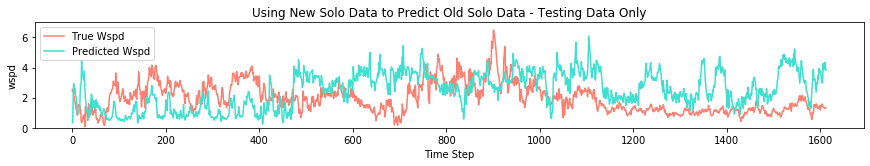

In [1199]:
Title = "Using New Solo Data to Predict Old Solo Data"
time = [i for i in range(1613)]

fig = plt.figure(figsize=(12, 2))

a = plt.gca()
a.set_ylim([0, 7])        

plt.plot(time, y_test12, label='True Wspd', color='salmon')
plt.plot(time, pred12, label='Predicted Wspd', color='turquoise')
       
fig.tight_layout()
       
# Set labels
plt.xlabel('Time Step')
plt.ylabel('wspd')

plt.title(Title + " - Testing Data Only")

plt.legend(loc="upper left")

plt.show()
plt.close()

In [1200]:
mse12 = mean_squared_error(y_test12, pred12)
mse12

2.686155973011821

In [1201]:
pred12_raw = model12.predict(mavic_prepared)
pred12 = []

for row in pred12_raw:
    pred12.append(row[0])
pred12 = np.array(pred12).reshape(-1,1)
pred12.shape

(2211, 1)

In [1202]:
y_test12 = []
for row in wind_mavic_prepared:
    y_test12.append(row[0])

y_test12 = np.array(y_test12).reshape(-1,1)
y_test12.shape

(2211, 1)

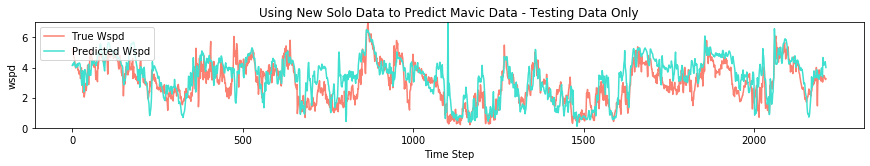

In [1204]:
Title = "Using New Solo Data to Predict Mavic Data"
time = [i for i in range(2211)]

fig = plt.figure(figsize=(12, 2))

a = plt.gca()
a.set_ylim([0, 7])        

plt.plot(time, y_test12, label='True Wspd', color='salmon')
plt.plot(time, pred12, label='Predicted Wspd', color='turquoise')
       
fig.tight_layout()
       
plt.xlabel('Time Step')
plt.ylabel('wspd')

plt.title(Title + " - Testing Data Only")

plt.legend(loc="upper left")

plt.show()
plt.close()

In [1205]:
mse12 = mean_squared_error(y_test12, pred12)
mse12

0.8914272453883836

## Model 13 - train by mavic dataset and test on both old and new solo dataset

In [1164]:
numPoints, numFeatures = 10, 5

model13 = tf.keras.models.Sequential()
model13.add(tf.keras.layers.LSTM(256, return_sequences=True, input_shape=(numPoints, numFeatures)))
model13.add(tf.keras.layers.Dropout(rate=0.2))
model13.add(tf.keras.layers.LSTM(128, return_sequences=True))
model13.add(tf.keras.layers.Dropout(rate=0.2))
model13.add(tf.keras.layers.LSTM(64, return_sequences=True))
model13.add(tf.keras.layers.Dropout(rate=0.2))
model13.add(tf.keras.layers.LSTM(32, activation='relu'))
model13.add(tf.keras.layers.Dense(1))


optimizer=tf.keras.optimizers.RMSprop(lr=0.001, rho=0.9)

model13.compile(
        optimizer=optimizer,
        loss = 'mse',
        metrics = ["accuracy"])

In [1185]:
History13 = model13.fit(mavic_prepared, wind_mavic_prepared, epochs=100)

Epoch 1/100
2211/2211 [==============================] - 42s 19ms/sample - loss: 0.7567 - acc: 0.0000e+00
Epoch 2/100
2211/2211 [==============================] - 42s 19ms/sample - loss: 0.6524 - acc: 0.0000e+00
Epoch 3/100
2211/2211 [==============================] - 42s 19ms/sample - loss: 0.5929 - acc: 0.0000e+00
Epoch 4/100
2211/2211 [==============================] - 42s 19ms/sample - loss: 0.5646 - acc: 0.0000e+00
Epoch 5/100
2211/2211 [==============================] - 42s 19ms/sample - loss: 0.5520 - acc: 0.0000e+00
Epoch 6/100
2211/2211 [==============================] - 42s 19ms/sample - loss: 0.5306 - acc: 0.0000e+00
Epoch 7/100
2211/2211 [==============================] - 42s 19ms/sample - loss: 0.5223 - acc: 0.0000e+00
Epoch 8/100
2211/2211 [==============================] - 42s 19ms/sample - loss: 0.4832 - acc: 0.0000e+00
Epoch 9/100
2211/2211 [==============================] - 42s 19ms/sample - loss: 0.4874 - acc: 0.0000e+00
Epoch 10/100
2211/2211 [======================

In [1206]:
pred13_raw = model13.predict(solo_prepared)
pred13 = []
for row in pred13_raw:
    pred13.append(row[0])
pred13 = np.array(pred13).reshape(-1,1)
pred13.shape

(2211, 1)

In [1207]:
y_test13 = []
for row in wind_solo_prepared:
    y_test13.append(row[0])

y_test13 = np.array(y_test13).reshape(-1,1)
y_test13.shape

(2211, 1)

In [1208]:
# y_train13 = []
# for row in y_train:
#     y_train13.append(row[0])

# y_train13 = np.array(y_train13).reshape(-1,1)
# y_train13.shape

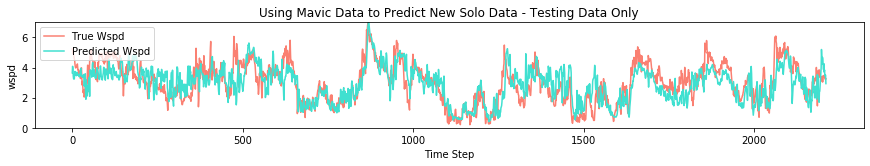

In [1209]:
Title = "Using Mavic Data to Predict New Solo Data"
time = [i for i in range(2211)]

fig = plt.figure(figsize=(12, 2))

a = plt.gca()
a.set_ylim([0, 7])        

plt.plot(time, y_test13, label='True Wspd', color='salmon')
plt.plot(time, pred13, label='Predicted Wspd', color='turquoise')
       
fig.tight_layout()
       
# Set labels
plt.xlabel('Time Step')
plt.ylabel('wspd')

plt.title(Title + " - Testing Data Only")

plt.legend(loc="upper left")

plt.show()
plt.close()

In [1191]:
mse13 = mean_squared_error(y_test13, pred13)
mse13

0.8116100829388104

In [1193]:
pred13_raw = model13.predict(old_solo_prepared)
pred13 = []
for row in pred13_raw:
    pred13.append(row[0])
pred13 = np.array(pred13).reshape(-1,1)
pred13.shape

(1613, 1)

In [1192]:
y_test13 = []
for row in old_solo_wind:
    y_test13.append(row[0])

y_test13 = np.array(y_test13).reshape(-1,1)
y_test13.shape

(1613, 1)

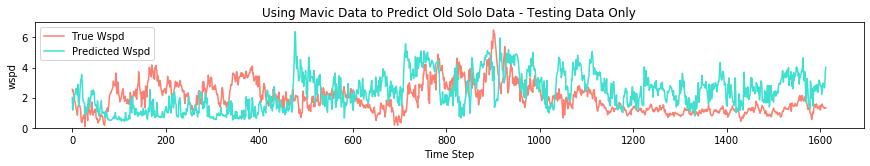

In [1194]:
Title = "Using Mavic Data to Predict Old Solo Data"
time = [i for i in range(1613)]

fig = plt.figure(figsize=(12, 2))

a = plt.gca()
a.set_ylim([0, 7])        

plt.plot(time, y_test13, label='True Wspd', color='salmon')
plt.plot(time, pred13, label='Predicted Wspd', color='turquoise')
       
fig.tight_layout()
       
# Set labels
plt.xlabel('Time Step')
plt.ylabel('wspd')

plt.title(Title + " - Testing Data Only")

plt.legend(loc="upper left")

plt.show()
plt.close()

In [1195]:
mse13 = mean_squared_error(y_test13, pred13)
mse13

2.3395763212550724

## Model 14 - train by old solo dataset and test on both new solo and mavic datasets

In [1210]:
numPoints, numFeatures = 10, 5

model14 = tf.keras.models.Sequential()
model14.add(tf.keras.layers.LSTM(256, return_sequences=True, input_shape=(numPoints, numFeatures)))
model14.add(tf.keras.layers.Dropout(rate=0.2))
model14.add(tf.keras.layers.LSTM(128, return_sequences=True))
model14.add(tf.keras.layers.Dropout(rate=0.2))
model14.add(tf.keras.layers.LSTM(64, return_sequences=True))
model14.add(tf.keras.layers.Dropout(rate=0.2))
model14.add(tf.keras.layers.LSTM(32, activation='relu'))
model14.add(tf.keras.layers.Dense(1))


optimizer=tf.keras.optimizers.RMSprop(lr=0.001, rho=0.9)

model14.compile(
        optimizer=optimizer,
        loss = 'mse',
        metrics = ["accuracy"])

In [1211]:
History14 = model14.fit(old_solo_prepared, old_solo_wind, epochs=100)

Epoch 1/100
1613/1613 [==============================] - 34s 21ms/sample - loss: 1.0036 - acc: 0.0043
Epoch 2/100
1613/1613 [==============================] - 28s 18ms/sample - loss: 0.5257 - acc: 0.0050
Epoch 3/100
1613/1613 [==============================] - 28s 18ms/sample - loss: 0.4403 - acc: 0.0050
Epoch 4/100
1613/1613 [==============================] - 28s 18ms/sample - loss: 0.4471 - acc: 0.0050
Epoch 5/100
1613/1613 [==============================] - 29s 18ms/sample - loss: 0.4153 - acc: 0.0050
Epoch 6/100
1613/1613 [==============================] - 28s 18ms/sample - loss: 0.3792 - acc: 0.0050
Epoch 7/100
1613/1613 [==============================] - 28s 18ms/sample - loss: 0.3824 - acc: 0.0050
Epoch 8/100
1613/1613 [==============================] - 28s 18ms/sample - loss: 0.3717 - acc: 0.0050
Epoch 9/100
1613/1613 [==============================] - 28s 18ms/sample - loss: 0.3664 - acc: 0.0050
Epoch 10/100
1613/1613 [==============================] - 29s 18ms/sample - loss: 

In [1212]:
pred14_raw = model14.predict(solo_prepared)
pred14 = []
for row in pred14_raw:
    pred14.append(row[0])
pred14 = np.array(pred14).reshape(-1,1)
pred14.shape

(2211, 1)

In [1213]:
y_test14 = []
for row in wind_solo_prepared:
    y_test14.append(row[0])

y_test14 = np.array(y_test14).reshape(-1,1)
y_test14.shape

(2211, 1)

In [814]:
# y_train14 = []
# for row in y_train_solo:
#     y_train14.append(row[0])

# y_train14 = np.array(y_train14).reshape(-1,1)
# y_train14.shape

(1768, 1)

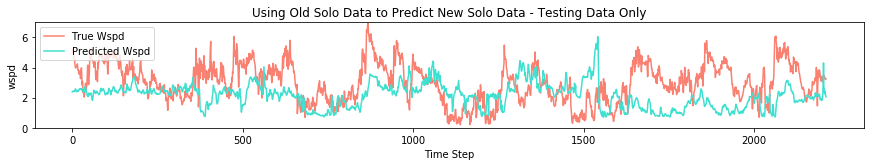

In [1214]:
Title = "Using Old Solo Data to Predict New Solo Data"
time = [i for i in range(2211)]

fig = plt.figure(figsize=(12, 2))

a = plt.gca()
a.set_ylim([0, 7])        

plt.plot(time, y_test14, label='True Wspd', color='salmon')
plt.plot(time, pred14, label='Predicted Wspd', color='turquoise')
       
fig.tight_layout()
       
# Set labels
plt.xlabel('Time Step')
plt.ylabel('wspd')

plt.title(Title + " - Testing Data Only")

plt.legend(loc="upper left")

plt.show()
plt.close()

In [1215]:
mse14 = mean_squared_error(y_test14, pred14)
mse14

2.8601604750029

In [1216]:
pred14_raw = model14.predict(mavic_prepared)
pred14 = []
for row in pred14_raw:
    pred14.append(row[0])
pred14 = np.array(pred14).reshape(-1,1)
pred14.shape

(2211, 1)

In [1219]:
y_test14 = []
for row in wind_mavic_prepared:
    y_test14.append(row[0])

y_test14 = np.array(y_test14).reshape(-1,1)
y_test14.shape

(2211, 1)

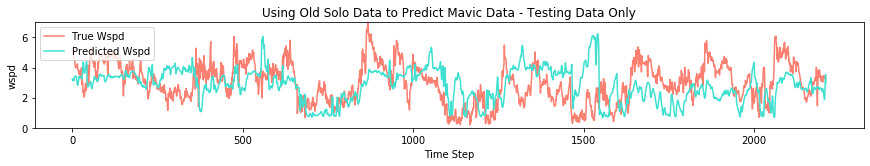

In [1220]:
Title = "Using Old Solo Data to Predict Mavic Data"
time = [i for i in range(2211)]

fig = plt.figure(figsize=(12, 2))

a = plt.gca()
a.set_ylim([0, 7])        

plt.plot(time, y_test14, label='True Wspd', color='salmon')
plt.plot(time, pred14, label='Predicted Wspd', color='turquoise')
       
fig.tight_layout()
       
# Set labels
plt.xlabel('Time Step')
plt.ylabel('wspd')

plt.title(Title + " - Testing Data Only")

plt.legend(loc="upper left")

plt.show()
plt.close()

In [1221]:
mse14 = mean_squared_error(y_test14, pred14)
mse14

2.231343180777604

## Model 15 - trained by new solo dataset (number of input variables - 5)

In [1224]:
numPoints, numFeatures = 10, 5

model15 = tf.keras.models.Sequential()
model15.add(tf.keras.layers.LSTM(256, return_sequences=True, input_shape=(numPoints, numFeatures)))
model15.add(tf.keras.layers.Dropout(rate=0.2))
model15.add(tf.keras.layers.LSTM(128, return_sequences=True))
model15.add(tf.keras.layers.Dropout(rate=0.2))
model15.add(tf.keras.layers.LSTM(64, return_sequences=True))
model15.add(tf.keras.layers.Dropout(rate=0.2))
model15.add(tf.keras.layers.LSTM(32, activation='relu'))
model15.add(tf.keras.layers.Dense(1))


optimizer=tf.keras.optimizers.RMSprop(lr=0.001, rho=0.9)

model15.compile(
        optimizer=optimizer,
        loss = 'mse',
        metrics = ["accuracy"])

In [1225]:
History15 = model15.fit(X_train_solo, y_train_solo, epochs=100)

Epoch 1/100
1768/1768 [==============================] - 41s 23ms/sample - loss: 2.0097 - acc: 0.0000e+00
Epoch 2/100
1768/1768 [==============================] - 34s 19ms/sample - loss: 1.1402 - acc: 0.0000e+00
Epoch 3/100
1768/1768 [==============================] - 34s 19ms/sample - loss: 1.0113 - acc: 0.0000e+00
Epoch 4/100
1768/1768 [==============================] - 35s 20ms/sample - loss: 0.8916 - acc: 0.0000e+00
Epoch 5/100
1768/1768 [==============================] - 34s 19ms/sample - loss: 0.8416 - acc: 0.0000e+00
Epoch 6/100
1768/1768 [==============================] - 34s 19ms/sample - loss: 0.8297 - acc: 0.0000e+00
Epoch 7/100
1768/1768 [==============================] - 34s 19ms/sample - loss: 0.7715 - acc: 0.0000e+00
Epoch 8/100
1768/1768 [==============================] - 34s 19ms/sample - loss: 0.7417 - acc: 0.0000e+00
Epoch 9/100
1768/1768 [==============================] - 34s 19ms/sample - loss: 0.7462 - acc: 0.0000e+00
Epoch 10/100
1768/1768 [======================

In [1228]:
pred15_raw = model15.predict(X_test_solo)
pred15 = []
for row in pred15_raw:
    pred15.append(row[0])
pred15 = np.array(pred15).reshape(-1,1)
pred15.shape

(443, 1)

In [1229]:
y_test15 = []
for row in y_test_solo:
    y_test15.append(row[0])

y_test15 = np.array(y_test15).reshape(-1,1)
y_test15.shape

(443, 1)

In [1230]:
y_train15 = []
for row in y_train_solo:
    y_train15.append(row[0])

y_train15 = np.array(y_train15).reshape(-1,1)
y_train15.shape

(1768, 1)

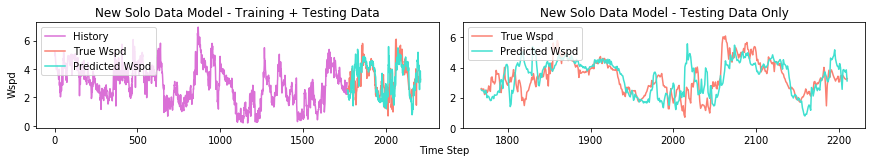

In [1233]:
Title = "New Solo Data Model"
time = [i for i in range(2211)]

fig = plt.figure(figsize=(12, 2))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1])
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1])

axes = [ax0, ax1]


a = plt.gca()
a.set_ylim([0, 7])        
       
axes[0].plot(time[:1768], y_train15,label='History', color='orchid')
axes[0].plot(time[1768:], y_test15,label='True Wspd', color='salmon')
axes[0].plot(time[1768:], pred15,label='Predicted Wspd', color='turquoise')
       
axes[1].plot(time[1768:], y_test15,label='True Wspd', color='salmon')
axes[1].plot(time[1768:], pred15,label='Predicted Wspd', color='turquoise')
    
fig.tight_layout()
       
# Set labels
fig.text(0.5, 0.04, 'Time Step', ha='center', va='center')
fig.text(0, 0.5, 'Wspd', ha='center', va='center', rotation='vertical')

axes[0].set_title(Title + " - Training + Testing Data")
axes[1].set_title(Title + " - Testing Data Only")

ax0.legend(loc="upper left")
ax1.legend(loc="upper left")
plt.show()
plt.close()

In [1235]:
mse15 = mean_squared_error(y_test15, pred15)
mse15

0.9254192927387652

## Model 16 - trained  by mavic dataset (number of input variables - 5)


In [1236]:
numPoints, numFeatures = 10, 5

model16 = tf.keras.models.Sequential()
model16.add(tf.keras.layers.LSTM(256, return_sequences=True, input_shape=(numPoints, numFeatures)))
model16.add(tf.keras.layers.Dropout(rate=0.2))
model16.add(tf.keras.layers.LSTM(128, return_sequences=True))
model16.add(tf.keras.layers.Dropout(rate=0.2))
model16.add(tf.keras.layers.LSTM(64, return_sequences=True))
model16.add(tf.keras.layers.Dropout(rate=0.2))
model16.add(tf.keras.layers.LSTM(32, activation='relu'))
model16.add(tf.keras.layers.Dense(1))


optimizer=tf.keras.optimizers.RMSprop(lr=0.001, rho=0.9)

model16.compile(
        optimizer=optimizer,
        loss = 'mse',
        metrics = ["accuracy"])

In [1237]:
History16 = model16.fit(X_train_mavic, y_train_mavic, epochs=100)

Epoch 1/100
1768/1768 [==============================] - 40s 23ms/sample - loss: 1.8827 - acc: 0.0000e+00
Epoch 2/100
1768/1768 [==============================] - 35s 20ms/sample - loss: 0.9870 - acc: 0.0000e+00
Epoch 3/100
1768/1768 [==============================] - 34s 19ms/sample - loss: 0.9540 - acc: 0.0000e+00
Epoch 4/100
1768/1768 [==============================] - 34s 19ms/sample - loss: 0.8142 - acc: 0.0000e+00
Epoch 5/100
1768/1768 [==============================] - 35s 20ms/sample - loss: 0.7725 - acc: 0.0000e+00
Epoch 6/100
1768/1768 [==============================] - 35s 20ms/sample - loss: 0.7630 - acc: 0.0000e+00
Epoch 7/100
1768/1768 [==============================] - 34s 19ms/sample - loss: 0.6899 - acc: 0.0000e+00
Epoch 8/100
1768/1768 [==============================] - 34s 19ms/sample - loss: 0.6999 - acc: 0.0000e+00
Epoch 9/100
1768/1768 [==============================] - 34s 19ms/sample - loss: 0.6713 - acc: 0.0000e+00
Epoch 10/100
1768/1768 [======================

In [1238]:
pred16_raw = model16.predict(X_test_mavic)
pred16 = []
for row in pred16_raw:
    pred16.append(row[0])
pred16 = np.array(pred16).reshape(-1,1)
pred16.shape

(443, 1)

In [1239]:
y_test16 = []
for row in y_test_mavic:
    y_test16.append(row[0])

y_test16 = np.array(y_test16).reshape(-1,1)
y_test16.shape

(443, 1)

In [1240]:
y_train16 = []
for row in y_train_mavic:
    y_train16.append(row[0])

y_train16 = np.array(y_train16).reshape(-1,1)
y_train16.shape

(1768, 1)

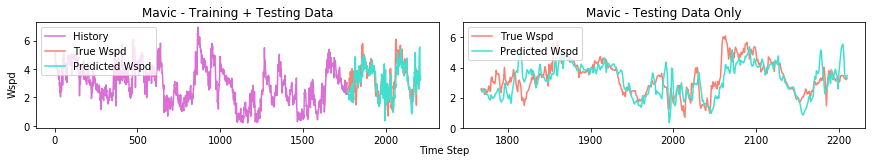

In [1241]:
Title = "Mavic Data Model"
time = [i for i in range(2211)]

fig = plt.figure(figsize=(12, 2))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1])
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1])

axes = [ax0, ax1]


a = plt.gca()
a.set_ylim([0, 7])        
       
axes[0].plot(time[:1768], y_train16, label='History', color='orchid')
axes[0].plot(time[1768:], y_test16, label='True Wspd', color='salmon')
axes[0].plot(time[1768:], pred16, label='Predicted Wspd', color='turquoise')
       
axes[1].plot(time[1768:], y_test16, label='True Wspd', color='salmon')
axes[1].plot(time[1768:], pred16, label='Predicted Wspd', color='turquoise')
    
fig.tight_layout()
       
# Set labels
fig.text(0.5, 0.04, 'Time Step', ha='center', va='center')
fig.text(0, 0.5, 'Wspd', ha='center', va='center', rotation='vertical')

axes[0].set_title(Title + " - Training + Testing Data")
axes[1].set_title(Title + " - Testing Data Only")

ax0.legend(loc="upper left")
ax1.legend(loc="upper left")
plt.show()
plt.close()

In [1242]:
mse16 = mean_squared_error(y_test16, pred16)
mse16

0.6908390280840017

## Model 17 - train by both mavic and new solo datasets (number of input variables - 10)

In [1254]:
numPoints, numFeatures = 10, 10

model17 = tf.keras.models.Sequential()
model17.add(tf.keras.layers.LSTM(256, return_sequences=True, input_shape=(numPoints, numFeatures)))
model17.add(tf.keras.layers.Dropout(rate=0.2))
model17.add(tf.keras.layers.LSTM(128, return_sequences=True))
model17.add(tf.keras.layers.Dropout(rate=0.2))
model17.add(tf.keras.layers.LSTM(64, return_sequences=True))
model17.add(tf.keras.layers.Dropout(rate=0.2))
model17.add(tf.keras.layers.LSTM(32, activation='relu'))
model17.add(tf.keras.layers.Dense(1))

optimizer=tf.keras.optimizers.RMSprop(lr=0.001, rho=0.9)

model17.compile(
        optimizer=optimizer,
        loss = 'mse',
        metrics = ["accuracy"])

In [1255]:
History17 = model17.fit(X_train_special, y_train_special, epochs=100)

Epoch 1/100
1768/1768 [==============================] - 42s 24ms/sample - loss: 1.8556 - acc: 0.0000e+00
Epoch 2/100
1768/1768 [==============================] - 36s 20ms/sample - loss: 1.0407 - acc: 0.0000e+00
Epoch 3/100
1768/1768 [==============================] - 36s 20ms/sample - loss: 0.9376 - acc: 0.0000e+00
Epoch 4/100
1768/1768 [==============================] - 36s 20ms/sample - loss: 0.8772 - acc: 0.0000e+00
Epoch 5/100
1768/1768 [==============================] - 36s 20ms/sample - loss: 0.7343 - acc: 0.0000e+00
Epoch 6/100
1768/1768 [==============================] - 36s 20ms/sample - loss: 0.7628 - acc: 0.0000e+00
Epoch 7/100
1768/1768 [==============================] - 36s 21ms/sample - loss: 0.7303 - acc: 0.0000e+00
Epoch 8/100
1768/1768 [==============================] - 36s 20ms/sample - loss: 0.6911 - acc: 0.0000e+00
Epoch 9/100
1768/1768 [==============================] - 36s 20ms/sample - loss: 0.6728 - acc: 0.0000e+00
Epoch 10/100
1768/1768 [======================

In [1257]:
pred17_raw = model17.predict(X_test_special)
pred17 = []
for row in pred17_raw:
    pred17.append(row[0])
pred17 = np.array(pred17).reshape(-1,1)
pred17.shape

(443, 1)

In [1258]:
y_test17 = []
for row in y_test_special:
    y_test17.append(row[0])

y_test17 = np.array(y_test17).reshape(-1,1)
y_test17.shape

(443, 1)

In [1259]:
y_train17 = []
for row in y_train_special:
    y_train17.append(row[0])

y_train17 = np.array(y_train17).reshape(-1,1)
y_train17.shape

(1768, 1)

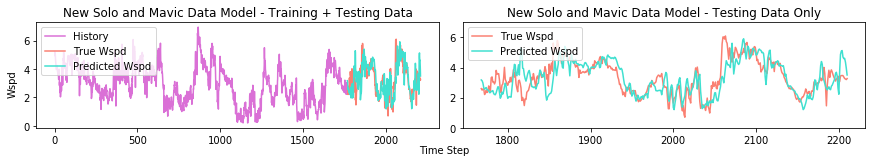

In [1263]:
Title = "New Solo and Mavic Data Model"
time = [i for i in range(2211)]

fig = plt.figure(figsize=(12, 2))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1])
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1])

axes = [ax0, ax1]


a = plt.gca()
a.set_ylim([0, 7])        
       
axes[0].plot(time[:1768], y_train17, label='History', color='orchid')
axes[0].plot(time[1768:], y_test17, label='True Wspd', color='salmon')
axes[0].plot(time[1768:], pred17, label='Predicted Wspd', color='turquoise')
       
axes[1].plot(time[1768:], y_test17, label='True Wspd', color='salmon')
axes[1].plot(time[1768:], pred17, label='Predicted Wspd', color='turquoise')
    
fig.tight_layout()
       
# Set labels
fig.text(0.5, 0.04, 'Time Step', ha='center', va='center')
fig.text(0, 0.5, 'Wspd', ha='center', va='center', rotation='vertical')

axes[0].set_title(Title + " - Training + Testing Data")
axes[1].set_title(Title + " - Testing Data Only")

ax0.legend(loc="upper left")
ax1.legend(loc="upper left")
plt.show()
plt.close()

In [1261]:
mse17 = mean_squared_error(y_test17, pred17)
mse17

0.6269118943354471

# KNN Approach 

## Old Solo Dataset

In [1302]:
# check which model has the lowest rmse
rmse_val = []
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train_knn, y_train_knn)  #fit the model
    pred = model.predict(X_test_knn) #make prediction on test set
    error = mean_squared_error(y_test_knn, pred) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 0.46794144144144145
RMSE value for k=  2 is: 0.3288446696696697
RMSE value for k=  3 is: 0.31417544210877546
RMSE value for k=  4 is: 0.2917693881381382
RMSE value for k=  5 is: 0.27536747147147145
RMSE value for k=  6 is: 0.26202677677677677
RMSE value for k=  7 is: 0.25366096096096097
RMSE value for k=  8 is: 0.25421735641891896
RMSE value for k=  9 is: 0.2517845771697624
RMSE value for k=  10 is: 0.2495003093093093
RMSE value for k=  11 is: 0.24843690467326832
RMSE value for k=  12 is: 0.24383822781114448
RMSE value for k=  13 is: 0.24648784938784943
RMSE value for k=  14 is: 0.2466674756389042
RMSE value for k=  15 is: 0.24459451851851852
RMSE value for k=  16 is: 0.2435091462556306
RMSE value for k=  17 is: 0.24087424275486558
RMSE value for k=  18 is: 0.24463170299929557
RMSE value for k=  19 is: 0.2451337492617271
RMSE value for k=  20 is: 0.24327760510510507


In [1303]:
knn_model1 = neighbors.KNeighborsRegressor(n_neighbors = 16)
knn_model1.fit(X_train_knn, y_train_knn)  #fit the model

pred = knn_model1.predict(X_test_knn)
pred.shape

(333,)

In [1304]:
y_test_knn.shape

(333,)

In [1305]:
y_train_knn.shape

(1290,)

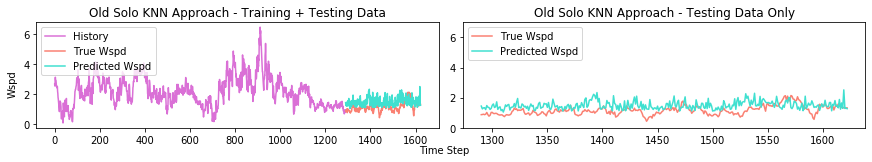

In [1306]:
Title = "Old Solo KNN Approach"
time = [i for i in range(1623)]

fig = plt.figure(figsize=(12, 2))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1])
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1])

axes = [ax0, ax1]


a = plt.gca()
a.set_ylim([0, 7])        
       
axes[0].plot(time[:1290], y_train_knn, label='History', color='orchid')
axes[0].plot(time[1290:], y_test_knn, label='True Wspd', color='salmon')
axes[0].plot(time[1290:], pred, label='Predicted Wspd', color='turquoise')
       
axes[1].plot(time[1290:], y_test_knn, label='True Wspd', color='salmon')
axes[1].plot(time[1290:], pred, label='Predicted Wspd', color='turquoise')
    
fig.tight_layout()
       
# Set labels
fig.text(0.5, 0.04, 'Time Step', ha='center', va='center')
fig.text(0, 0.5, 'Wspd', ha='center', va='center', rotation='vertical')

axes[0].set_title(Title + " - Training + Testing Data")
axes[1].set_title(Title + " - Testing Data Only")

ax0.legend(loc="upper left")
ax1.legend(loc="upper left")
plt.show()
plt.close()

In [1301]:
mse = mean_squared_error(y_test_knn, pred)
mse

4.313453424425666

## New Solo Dataset

In [1292]:
# check which model has the lowest rmse
rmse_val = []
for K in range(39, 60):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train_solo_knn, y_train_solo_knn)  #fit the model
    pred = model.predict(X_test_solo_knn) #make prediction on test set
    error = mean_squared_error(y_test_solo_knn, pred) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('MSE value for k= ' , K , 'is:', error)

MSE value for k=  40 is: 0.5952896866972913
MSE value for k=  41 is: 0.5961513782719976
MSE value for k=  42 is: 0.5937068883284177
MSE value for k=  43 is: 0.5917787928770305
MSE value for k=  44 is: 0.5924914978255872
MSE value for k=  45 is: 0.5937329434277488
MSE value for k=  46 is: 0.5975610385132549
MSE value for k=  47 is: 0.5960213148920124
MSE value for k=  48 is: 0.5970257103916199
MSE value for k=  49 is: 0.5957237807178116
MSE value for k=  50 is: 0.596047791356819
MSE value for k=  51 is: 0.5953277607755787
MSE value for k=  52 is: 0.5944601553424669
MSE value for k=  53 is: 0.5957283766636422
MSE value for k=  54 is: 0.5932490431828632
MSE value for k=  55 is: 0.5934219490076051
MSE value for k=  56 is: 0.5959286825488377
MSE value for k=  57 is: 0.5936759946606353
MSE value for k=  58 is: 0.5950408072423713
MSE value for k=  59 is: 0.5970537154609299
MSE value for k=  60 is: 0.5967836029816724


In [1307]:
knn_model2 = neighbors.KNeighborsRegressor(n_neighbors = 43)
knn_model2.fit(X_train_solo_knn, y_train_solo_knn)  #fit the model

pred2 = knn_model2.predict(X_test_solo_knn)
pred2.shape

(453, 1)

In [1308]:
y_test_solo_knn.shape

(453, 1)

In [1309]:
y_train_solo_knn.shape

(1768, 1)

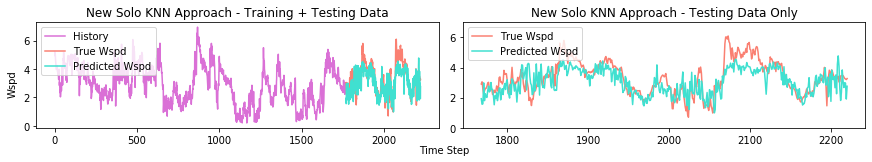

In [1311]:
Title = "New Solo KNN Approach"
time = [i for i in range(2221)]

fig = plt.figure(figsize=(12, 2))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1])
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1])

axes = [ax0, ax1]


a = plt.gca()
a.set_ylim([0, 7])        
       
axes[0].plot(time[:1768], y_train_solo_knn, label='History', color='orchid')
axes[0].plot(time[1768:], y_test_solo_knn, label='True Wspd', color='salmon')
axes[0].plot(time[1768:], pred2, label='Predicted Wspd', color='turquoise')
       
axes[1].plot(time[1768:], y_test_solo_knn, label='True Wspd', color='salmon')
axes[1].plot(time[1768:], pred2, label='Predicted Wspd', color='turquoise')
    
fig.tight_layout()
       
# Set labels
fig.text(0.5, 0.04, 'Time Step', ha='center', va='center')
fig.text(0, 0.5, 'Wspd', ha='center', va='center', rotation='vertical')

axes[0].set_title(Title + " - Training + Testing Data")
axes[1].set_title(Title + " - Testing Data Only")

ax0.legend(loc="upper left")
ax1.legend(loc="upper left")
plt.show()
plt.close()

In [1313]:
mse2 = mean_squared_error(y_test_solo_knn, pred2)
mse2

0.5917787928770305

## Mavic Dataset 

In [1314]:
# check which model has the lowest rmse
rmse_val = []
for K in range(39, 60):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train_mavic_knn, y_train_mavic_knn)  #fit the model
    pred = model.predict(X_test_mavic_knn) #make prediction on test set
    error = mean_squared_error(y_test_mavic_knn, pred) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('MSE value for k= ' , K , 'is:', error)

MSE value for k=  40 is: 0.5434672448325494
MSE value for k=  41 is: 0.5415103672439494
MSE value for k=  42 is: 0.5410137925856074
MSE value for k=  43 is: 0.5405065375347406
MSE value for k=  44 is: 0.5393940180156873
MSE value for k=  45 is: 0.5388820837464173
MSE value for k=  46 is: 0.5375284521411781
MSE value for k=  47 is: 0.5364208513782295
MSE value for k=  48 is: 0.5353408049373696
MSE value for k=  49 is: 0.5318009360382244
MSE value for k=  50 is: 0.531408409682066
MSE value for k=  51 is: 0.5311536204933748
MSE value for k=  52 is: 0.5307767270801854
MSE value for k=  53 is: 0.5302255183425939
MSE value for k=  54 is: 0.5295857953008204
MSE value for k=  55 is: 0.5306091900090788
MSE value for k=  56 is: 0.5315858594199065
MSE value for k=  57 is: 0.5321859867633812
MSE value for k=  58 is: 0.5314537435820105
MSE value for k=  59 is: 0.5318066968009448
MSE value for k=  60 is: 0.5319453431705371


In [1316]:
knn_model3 = neighbors.KNeighborsRegressor(n_neighbors = 43)
knn_model3.fit(X_train_mavic_knn, y_train_mavic_knn)  #fit the model

pred3 = knn_model3.predict(X_test_mavic_knn)
pred3.shape

(453, 1)

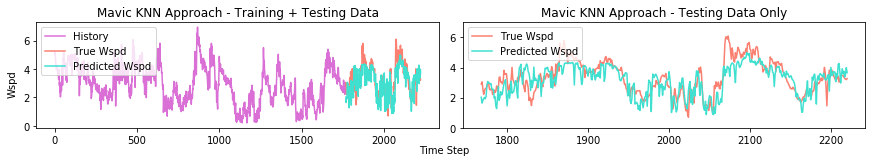

In [1317]:
Title = "Mavic KNN Approach"
time = [i for i in range(2221)]

fig = plt.figure(figsize=(12, 2))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1])
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1])

axes = [ax0, ax1]


a = plt.gca()
a.set_ylim([0, 7])        
       
axes[0].plot(time[:1768], y_train_solo_knn, label='History', color='orchid')
axes[0].plot(time[1768:], y_test_solo_knn, label='True Wspd', color='salmon')
axes[0].plot(time[1768:], pred3, label='Predicted Wspd', color='turquoise')
       
axes[1].plot(time[1768:], y_test_solo_knn, label='True Wspd', color='salmon')
axes[1].plot(time[1768:], pred3, label='Predicted Wspd', color='turquoise')
    
fig.tight_layout()
       
# Set labels
fig.text(0.5, 0.04, 'Time Step', ha='center', va='center')
fig.text(0, 0.5, 'Wspd', ha='center', va='center', rotation='vertical')

axes[0].set_title(Title + " - Training + Testing Data")
axes[1].set_title(Title + " - Testing Data Only")

ax0.legend(loc="upper left")
ax1.legend(loc="upper left")
plt.show()
plt.close()

In [1318]:
mse3 = mean_squared_error(y_test_mavic_knn, pred3)
mse3

0.5405065375347406